### LEGO market trends analysis 

In [1]:
# install.packages("tidyverse")
# install.packages("reshape2")
# install.packages("gridExtra")
# install.packages("RColorBrewer")
Sys.setenv(LANGUAGE = "en") 

In [2]:
# Load libraries
library(tidyverse)
library(reshape2)
library(gridExtra)
library(RColorBrewer)
options(repr.plot.width = 18, repr.plot.height = 9)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'reshape2' was built under R version 4.3.2"

Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In [3]:
# Read dataset
market_data <- 
  "market_data.csv" %>%
  read_csv()

Rows: 5002 Columns: 8
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): set_id, theme_name, set_name
dbl (5): year, retail_price, rating, used_set_profit, new_set_profit

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# Check dataset
market_data %>%
  glimpse()

Rows: 5,002
Columns: 8
$ year            <dbl> 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, …
$ set_id          <chr> "4559-1", "4565-1", "5876-1", "6024-1", "6135-1", "614…
$ theme_name      <chr> "Trains", "Trains", "Belville", "Castle", "Aquazone", …
$ set_name        <chr> "Cargo Railway", "Freight and Crane Railway", "Belvill…
$ retail_price    <dbl> 130.00, 140.00, 30.00, 6.50, 8.75, 12.00, 50.00, 8.75,…
$ rating          <dbl> 4.3, 4.4, 0.0, 3.9, 3.6, 3.8, 4.4, 3.5, 4.0, 3.9, 3.3,…
$ used_set_profit <dbl> 86.43, 103.55, 10.88, 72.29, 3.04, 5.05, 56.77, 37.14,…
$ new_set_profit  <dbl> 632.15, 449.41, 45.00, 207.25, 11.25, 82.67, 350.00, 1…


In [5]:
# Check the details of year and the unique number of set_id
unique(market_data$year)
length(unique(market_data$set_id))

[1] 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
[16] 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022

[1] 5002

In [6]:
# Check the unique theme name
unique(market_data$theme_name)

[1] "Trains"                       "Belville"                    
  [3] "Castle"                       "Aquazone"                    
  [5] "Pirates"                      "Town"                        
  [7] "Time Cruisers"                "Western"                     
  [9] "Space"                        "Technic"                     
 [11] "Adventurers"                  "Scala"                       
 [13] "Znap"                         "Racers"                      
 [15] "Seasonal"                     "Rock Raiders"                
 [17] "Model Team"                   "Star Wars"                   
 [19] "Sports"                       "Advanced models"             
 [21] "Studios"                      "Mindstorms"                  
 [23] "Harry Potter"                 "Alpha Team"                  
 [25] "Bionicle"                     "Creator"                     
 [27] "Island Xtreme Stunts"         "Education"                   
 [29] "World City"                   "4 Juniors"                   
 [31] "Spider-Man"                   "Discovery"                   
 [33] "Hobby Set"                    "Duplo"                       
 [35] "Explore"                      "Clikits"                     
 [37] "Vikings"                      "City"                        
 [39] "Dino Attack"                  "SpongeBob SquarePants"       
 [41] "Avatar: The Last Airbender"   "Make and Create"             
 [43] "Exo-Force"                    "Batman"                      
 [45] "Aqua Raiders"                 "Bricks and More"             
 [47] "Indiana Jones"                "Power Functions"             
 [49] "Agents"                       "Architecture"                
 [51] "Games"                        "Power Miners"                
 [53] "HERO Factory"                 "Prince of Persia"            
 [55] "Toy Story"                    "Atlantis"                    
 [57] "Ben 10: Alien Force"          "Collectable Minifigures"     
 [59] "World Racers"                 "Promotional"                 
 [61] "Ninjago"                      "Pirates of the Caribbean"    
 [63] "Cars"                         "Master Builder Academy"      
 [65] "Friends"                      "DC Comics Super Heroes"      
 [67] "Marvel Super Heroes"          "Dino"                        
 [69] "Monster Fighters"             "The Lord of the Rings"       
 [71] "Ideas"                        "The Hobbit"                  
 [73] "Creator Expert"               "Minecraft"                   
 [75] "Legends of Chima"             "The Lone Ranger"             
 [77] "Teenage Mutant Ninja Turtles" "Juniors"                     
 [79] "Fusion"                       "Disney"                      
 [81] "The LEGO Movie"               "Miscellaneous"               
 [83] "Mixels"                       "Ultra Agents"                
 [85] "The Simpsons"                 "Classic"                     
 [87] "Elves"                        "Dimensions"                  
 [89] "Speed Champions"              "Scooby-Doo"                  
 [91] "Jurassic World"               "Nexo Knights"                
 [93] "Boost"                        "DC Super Hero Girls"         
 [95] "BrickHeadz"                   "The LEGO Ninjago Movie"      
 [97] "The LEGO Batman Movie"        "Unikitty"                    
 [99] "Xtra"                         "The Powerpuff Girls"         
[101] "The LEGO Movie 2"             "Hidden Side"                 
[103] "Stranger Things"              "Overwatch"                   
[105] "FORMA"                        "Icons"                       
[107] "Super Mario"                  "Trolls World Tour"           
[109] "Dots"                         "Art"                         
[111] "Brick Sketches"               "Minions: The Rise of Gru"    
[113] "Monkie Kid"                   "Vidiyo"

In [7]:
# update the theme name to LEGO group's latest theme classification
market_data <- 
  market_data %>%
  mutate(theme_name = ifelse(theme_name == "Creator Expert", "Icons", theme_name),
         theme_name = ifelse(theme_name == "Advanced models", "Icons", theme_name))


In [8]:
# Find the themes with lowest consumer rating
tail_rating_themes <-
  market_data %>%
  filter(rating > 0) %>%  # Exclude records where rating is 0
  group_by(theme_name) %>%
  summarise(average_rating = round(mean(rating), 1)) %>%
  arrange(average_rating) %>%
  head(10)

tail_rating_themes

theme_name,average_rating
<chr>,<dbl>
Ben 10: Alien Force,2.9
4 Juniors,3.2
Make and Create,3.4
Monkie Kid,3.4
Dots,3.5
Juniors,3.5
Sports,3.5
Bricks and More,3.6
Cars,3.6


Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4."


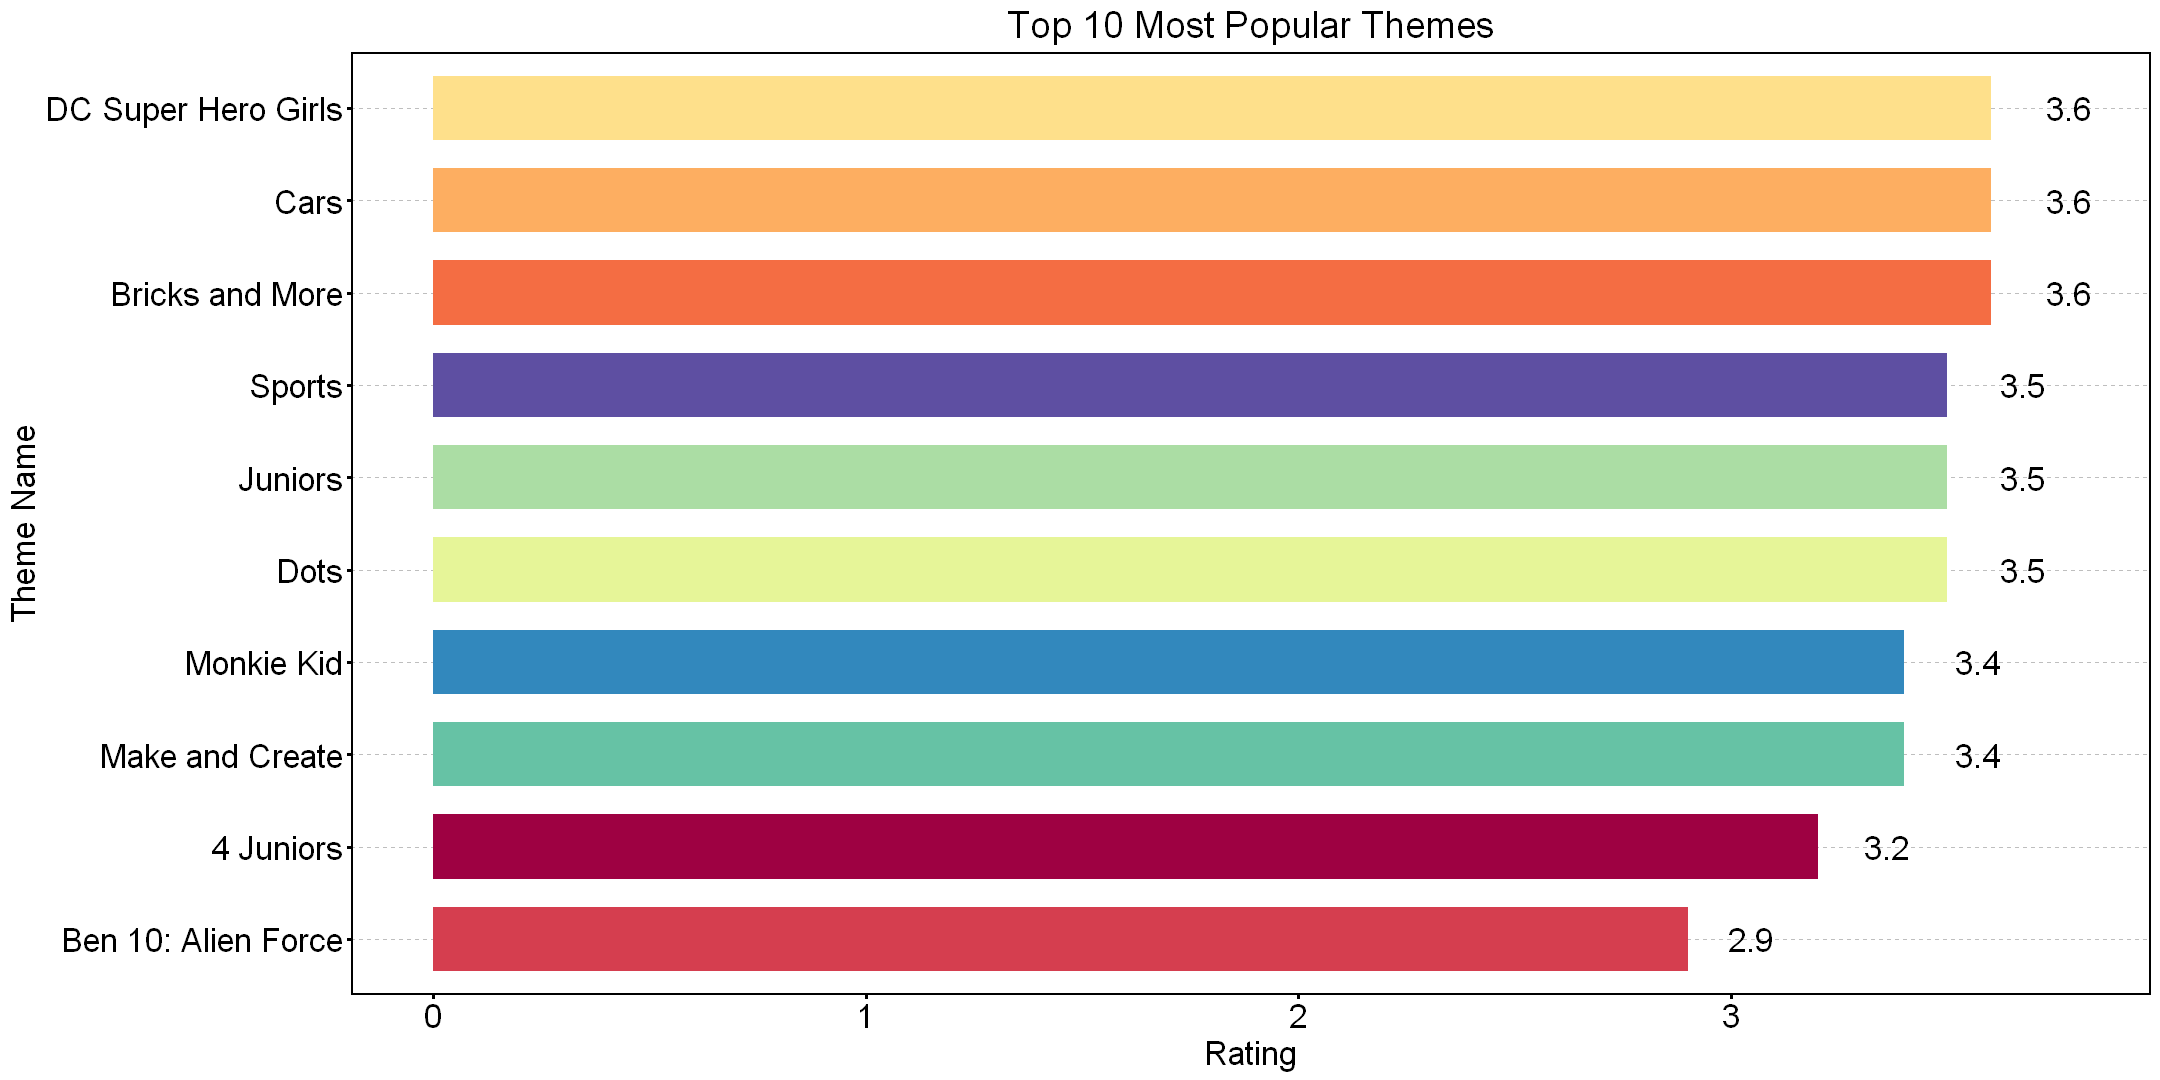

In [9]:
# Plot top 10 lowest rating themes
tail_rating_themes_plots <- 
  tail_rating_themes %>%
  ggplot(aes(x = reorder(theme_name, average_rating), y = average_rating, fill = theme_name)) +
  geom_bar(stat = "identity", width = 0.7) +
  geom_text(aes(label = average_rating), position = position_stack(vjust = 1.05), size = 7) +
  labs(title = "Top 10 Most Popular Themes",
       x = "Theme Name",
       y = "Rating") +
  scale_fill_brewer(palette = "Spectral") +  
  guides(fill = FALSE) +  
  theme_minimal() +
  coord_flip() +
  theme(
    plot.title = element_text(size = 22, hjust = 0.5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 20, color = "black"),
    panel.grid.major.y = element_line(colour = "gray", linetype = "dashed"),
    panel.grid.minor.y = element_blank(),
    axis.ticks = element_line(linewidth = 1),
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
    axis.line = element_line(colour = "black", linewidth = 0.5))

tail_rating_themes_plots

In [10]:
# Save the plot above
ggsave("tail_themes_rating_plot.jpg", plot = tail_rating_themes_plots, width = 15, height = 8, units = "in", dpi = 300)

In [11]:
# Find the top 10 sets with highest rating
top_rating_sets <-
  market_data %>%
  group_by(set_name) %>%
  arrange(desc(rating)) %>%
  select(year, theme_name, set_id, set_name, rating) %>%
  head(10)

top_rating_sets

year,theme_name,set_id,set_name,rating
<dbl>,<chr>,<chr>,<chr>,<dbl>
2008,Space,7649-1,MT-201 Ultra-Drill Walker,4.9
1999,Model Team,5563-1,Racing Truck,4.8
2007,Bionicle,8924-1,Maxilos and Spinax,4.8
2008,Bionicle,8943-1,Axalara T9,4.8
1996,Western,6769-1,Fort Legoredo,4.7
1998,Adventurers,5978-1,Sphinx Secret Surprise,4.7
1999,Rock Raiders,4980-1,The Tunnel Transport,4.7
1999,Adventurers,5986-1,Amazon Ancient Ruins,4.7
2001,Castle,10000-1,Guarded Inn,4.7


In [12]:
# Paste the set_id after set_name
top_rating_sets <- 
  top_rating_sets %>%
  mutate(set_name = paste(set_name, " (", gsub("(.+)-.*", "\\1", set_id), ")", sep=""))
top_rating_sets

year,theme_name,set_id,set_name,rating
<dbl>,<chr>,<chr>,<chr>,<dbl>
2008,Space,7649-1,MT-201 Ultra-Drill Walker (7649),4.9
1999,Model Team,5563-1,Racing Truck (5563),4.8
2007,Bionicle,8924-1,Maxilos and Spinax (8924),4.8
2008,Bionicle,8943-1,Axalara T9 (8943),4.8
1996,Western,6769-1,Fort Legoredo (6769),4.7
1998,Adventurers,5978-1,Sphinx Secret Surprise (5978),4.7
1999,Rock Raiders,4980-1,The Tunnel Transport (4980),4.7
1999,Adventurers,5986-1,Amazon Ancient Ruins (5986),4.7
2001,Castle,10000-1,Guarded Inn (10000),4.7


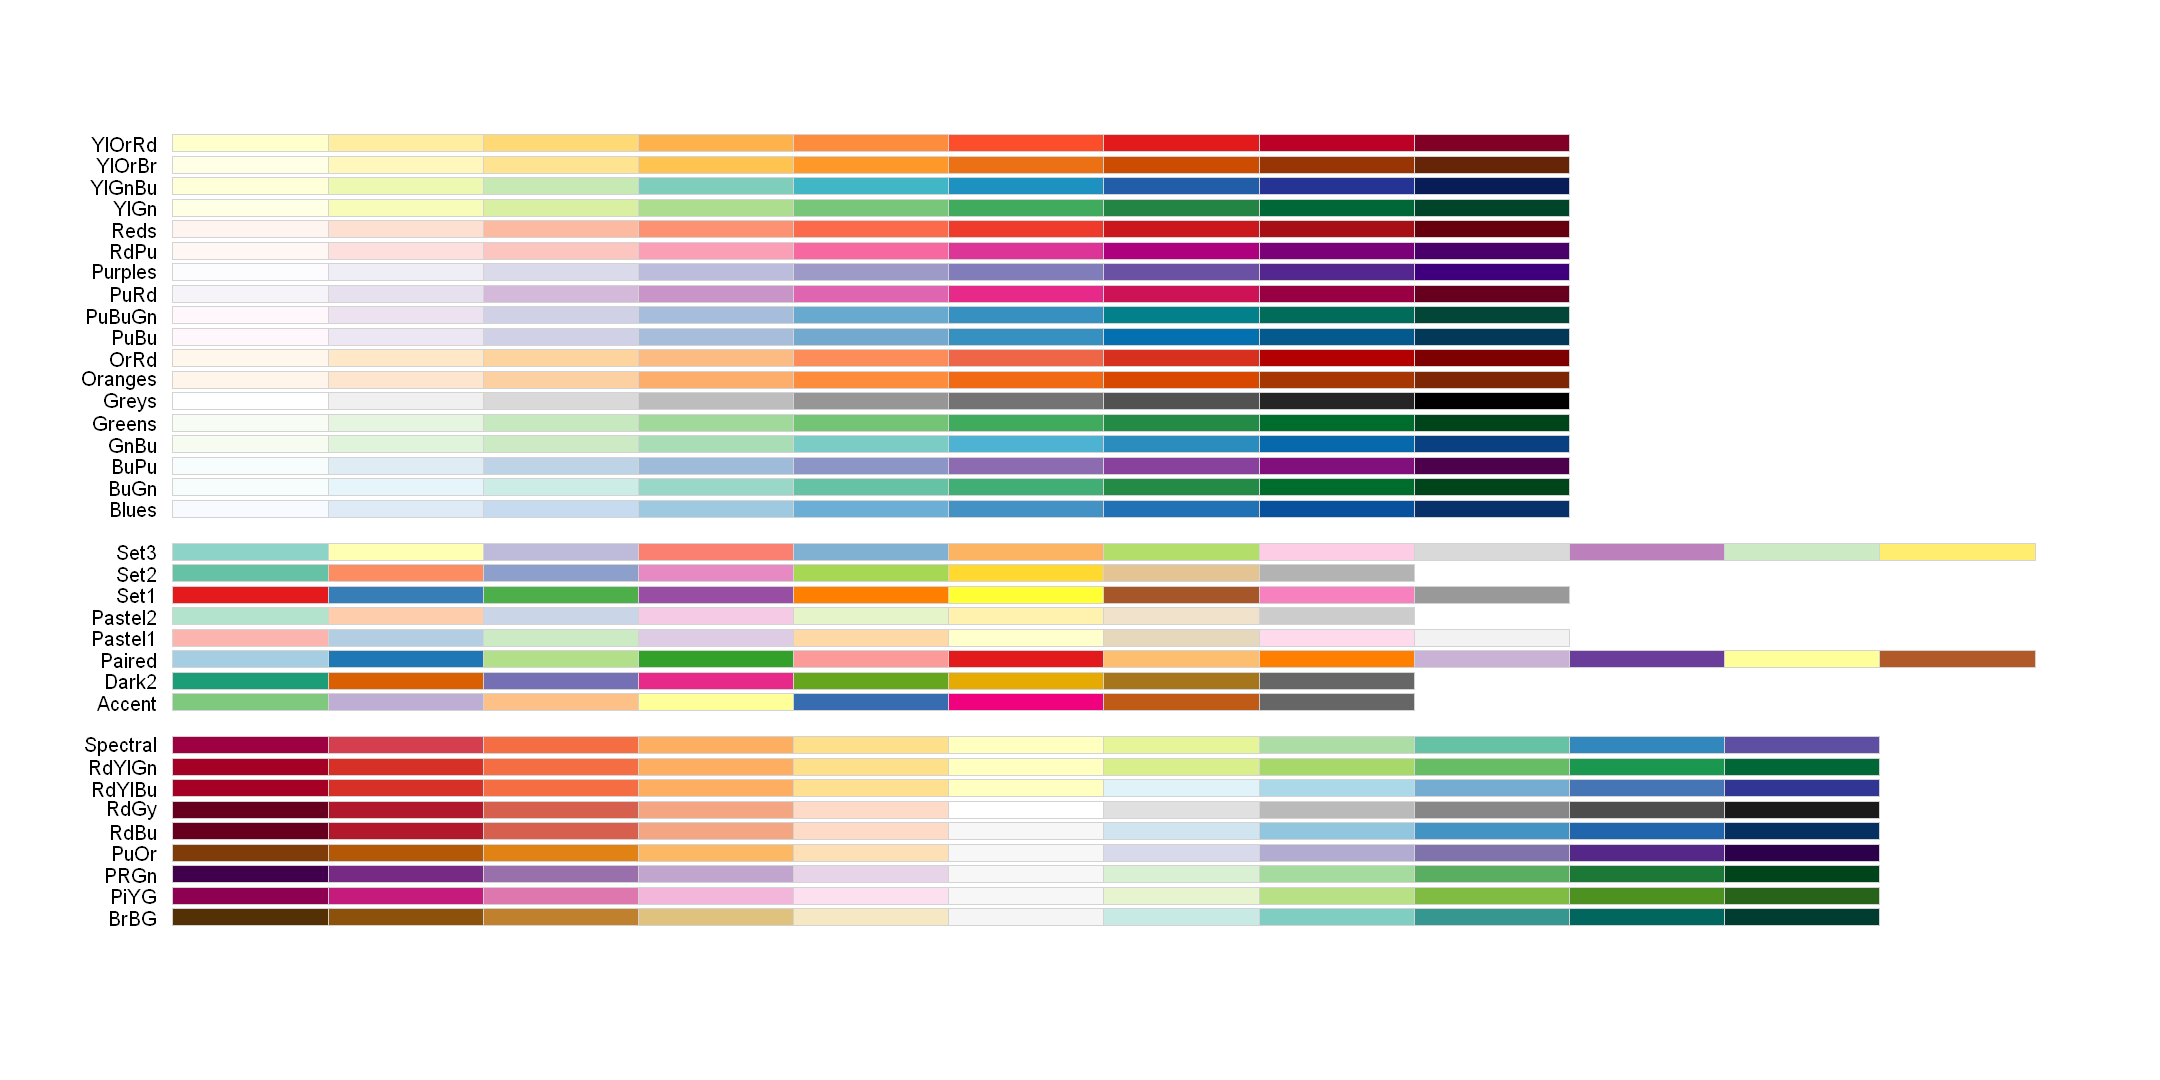

In [13]:
# Check the colour palette
display.brewer.all()

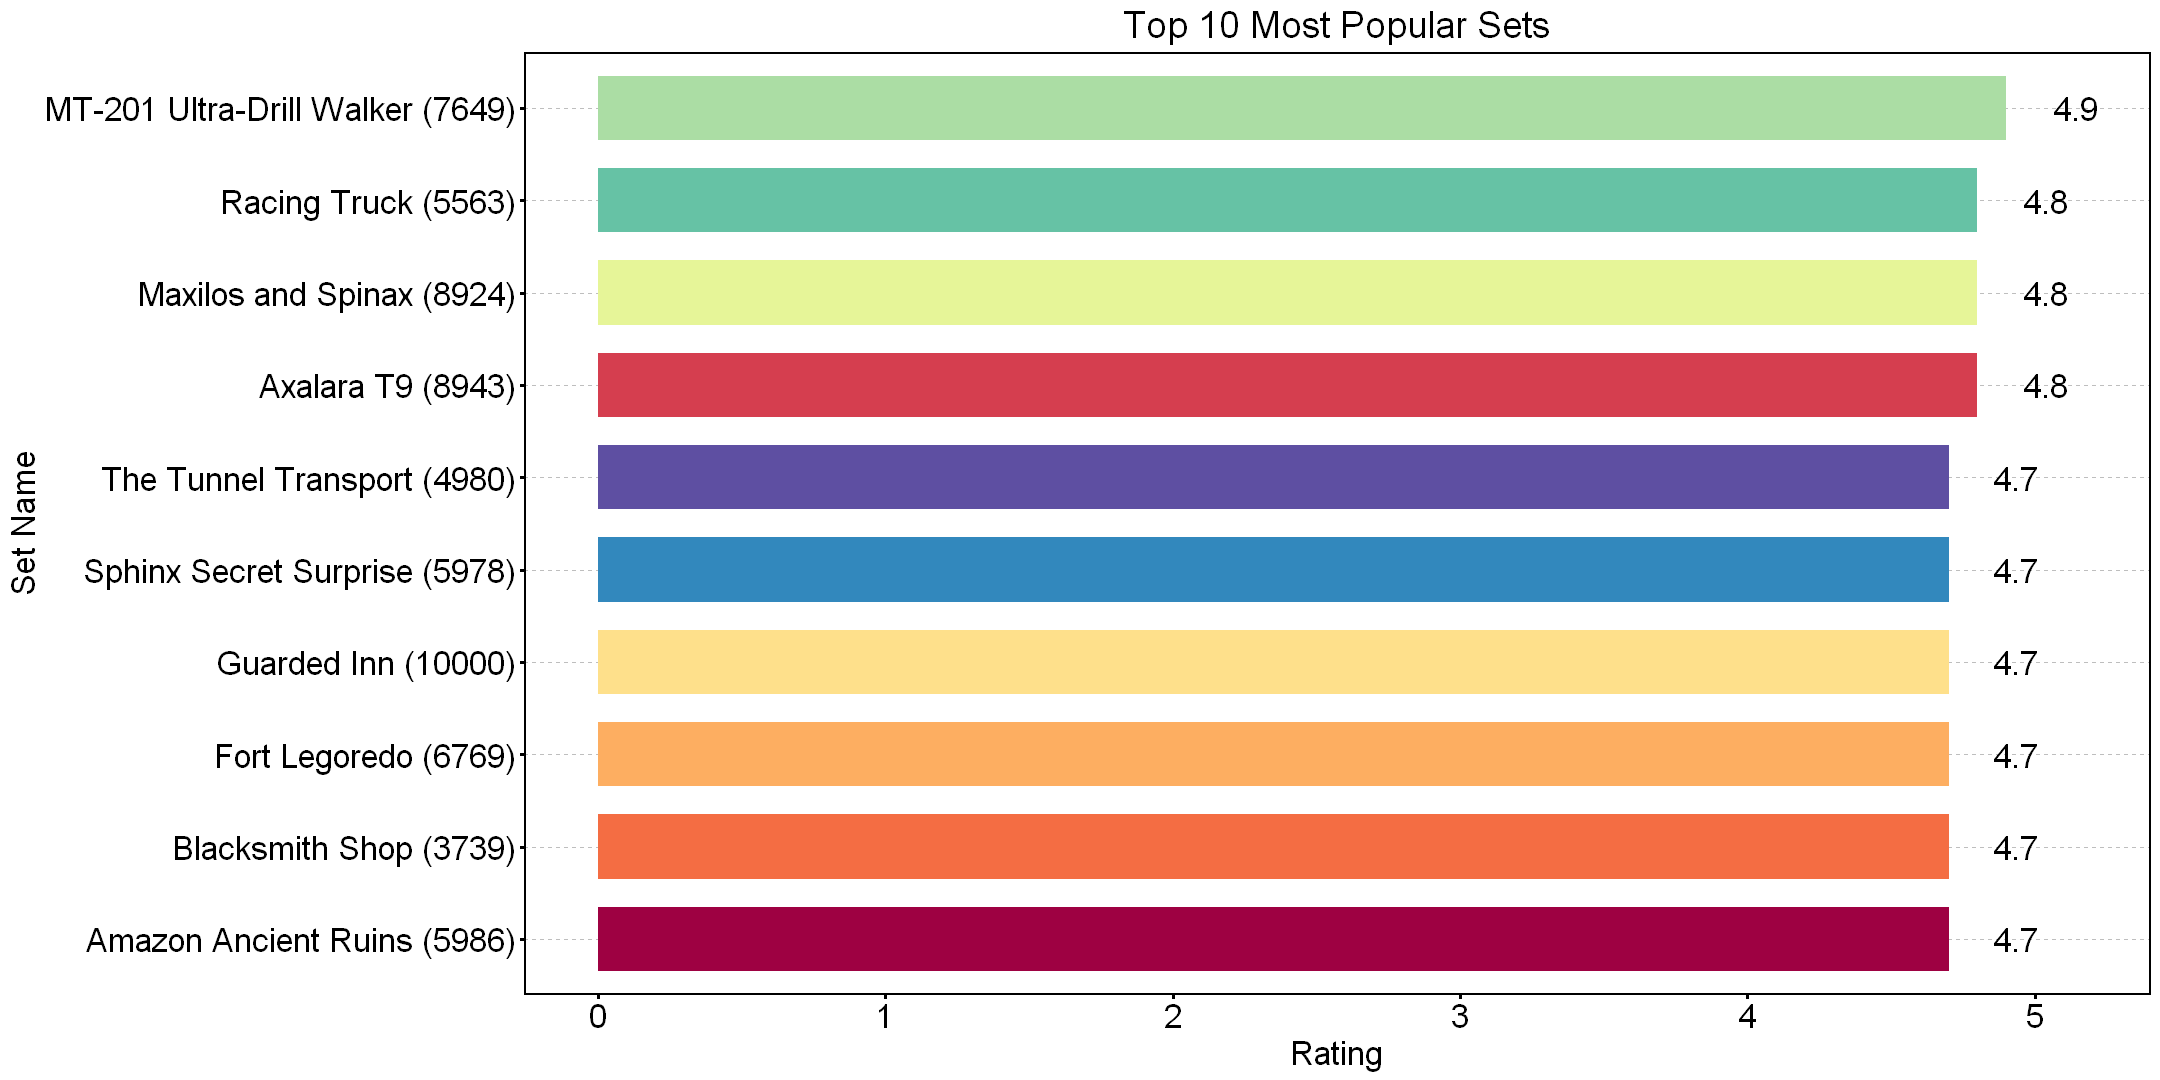

In [14]:
# Plot the top 10 sets with highest rating
top_rating_set_plots <- 
  top_rating_sets %>%
  ggplot(aes(x = reorder(set_name, rating), y = rating, fill = set_name)) +
  geom_bar(stat = "identity", width = 0.7) +
  geom_text(aes(label = rating), position = position_stack(vjust = 1.05), size = 7) +
  labs(title = "Top 10 Most Popular Sets",
       x = "Set Name",
       y = "Rating") +
  scale_fill_brewer(palette = "Spectral") +
  guides(fill = FALSE) + 
  theme_minimal() +
  coord_flip() +
  theme(
    plot.title = element_text(size = 22, hjust = 0.5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 20, color = "black"),
    panel.grid.major.y = element_line(colour = "gray", linetype = "dashed"),
    panel.grid.minor.y = element_blank(),
    axis.ticks = element_line(linewidth = 1),
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
    axis.line = element_line(colour = "black", linewidth = 0.5))

top_rating_set_plots

In [15]:
# Save the plot above
ggsave("top_sets_rating_plot.jpg", plot = top_rating_set_plots, width = 15, height = 8, units = "in", dpi = 300)

In [16]:
# Introduct two variables: the Return on Investment (ROI) for used sets and new sets
market_data <-
  market_data %>%
  mutate(used_rate = used_set_profit /  retail_price * 100,  # Calculate the ROI for used sets
         new_rate = new_set_profit / retail_price * 100)  # Calculate the ROI reate for new sets

In [17]:
# Find the top used 10 sets with highest ROI
top_used_sets_rate <-
  market_data %>%
  group_by(set_name) %>%
  arrange(desc(used_rate)) %>%
  select(year, theme_name, set_id, set_name, used_rate) %>%
  head(10)

top_used_sets_rate

year,theme_name,set_id,set_name,used_rate
<dbl>,<chr>,<chr>,<chr>,<dbl>
2012,Collectable Minifigures,8909-2,Stealth Swimmer,5182.943
2016,Collectable Minifigures,71012-2,Alien,3737.594
2018,Collectable Minifigures,71022-2,Hermione Granger,3611.278
2014,Collectable Minifigures,71005-2,Bart Simpson,2672.682
2021,Vidiyo,43108-2,Discowgirl Guitarist,2304.810
2018,Collectable Minifigures,71021-2,Brick Suit Guy,2271.679
2017,Collectable Minifigures,71017-2,Glam Metal Batman,1570.677
2017,Collectable Minifigures,71019-2,Spinjitzu Training Nya,1555.890
2006,Avatar: The Last Airbender,3828-1,Air Temple,1230.443


In [18]:
# Paste the set_id after set_name
top_used_sets_rate$set_name <- 
  paste0(top_used_sets_rate$set_name, " (", top_used_sets_rate $set_id, ")")
top_used_sets_rate

year,theme_name,set_id,set_name,used_rate
<dbl>,<chr>,<chr>,<chr>,<dbl>
2012,Collectable Minifigures,8909-2,Stealth Swimmer (8909-2),5182.943
2016,Collectable Minifigures,71012-2,Alien (71012-2),3737.594
2018,Collectable Minifigures,71022-2,Hermione Granger (71022-2),3611.278
2014,Collectable Minifigures,71005-2,Bart Simpson (71005-2),2672.682
2021,Vidiyo,43108-2,Discowgirl Guitarist (43108-2),2304.810
2018,Collectable Minifigures,71021-2,Brick Suit Guy (71021-2),2271.679
2017,Collectable Minifigures,71017-2,Glam Metal Batman (71017-2),1570.677
2017,Collectable Minifigures,71019-2,Spinjitzu Training Nya (71019-2),1555.890
2006,Avatar: The Last Airbender,3828-1,Air Temple (3828-1),1230.443


In [19]:
# Find the top 10 new sets with highest ROI
top_new_sets_rate <-
  market_data %>%
  group_by(set_name) %>%
  arrange(desc(new_rate)) %>%
  select(year, theme_name, set_id, set_name, new_rate) %>%
  head(10)

top_new_sets_rate

year,theme_name,set_id,set_name,new_rate
<dbl>,<chr>,<chr>,<chr>,<dbl>
2003,Star Wars,10123-1,Cloud City,8900.000
2002,Studios,10075-1,Spider-Man Action Pack,7782.429
2012,Collectable Minifigures,8909-2,Stealth Swimmer,7223.077
2018,Collectable Minifigures,71022-2,Hermione Granger,4669.925
1998,Adventurers,2996-1,Adventurers Tomb,4475.125
2021,Collectable Minifigures,71031-3,Monica Rambeau,4389.780
2016,Collectable Minifigures,71012-2,Alien,4053.885
1999,Adventurers,1271-1,Jungle Surprise,3400.000
2021,Collectable Minifigures,71030-3,Wile E. Coyote,3390.381


In [20]:
# Paste the set_id after set_name
top_new_sets_rate$set_name <- 
  paste0(top_new_sets_rate$set_name, " (", top_new_sets_rate$set_id, ")")
top_new_sets_rate

year,theme_name,set_id,set_name,new_rate
<dbl>,<chr>,<chr>,<chr>,<dbl>
2003,Star Wars,10123-1,Cloud City (10123-1),8900.000
2002,Studios,10075-1,Spider-Man Action Pack (10075-1),7782.429
2012,Collectable Minifigures,8909-2,Stealth Swimmer (8909-2),7223.077
2018,Collectable Minifigures,71022-2,Hermione Granger (71022-2),4669.925
1998,Adventurers,2996-1,Adventurers Tomb (2996-1),4475.125
2021,Collectable Minifigures,71031-3,Monica Rambeau (71031-3),4389.780
2016,Collectable Minifigures,71012-2,Alien (71012-2),4053.885
1999,Adventurers,1271-1,Jungle Surprise (1271-1),3400.000
2021,Collectable Minifigures,71030-3,Wile E. Coyote (71030-3),3390.381


In [21]:
# Merge two datasets: top 10 used sets and new sets with highest ROI
used_new_sets_rate_data <- 
  bind_rows(
    mutate(top_used_sets_rate, category = "used"),
    mutate(top_new_sets_rate, category = "x_new")
  )
used_new_sets_rate_data

year,theme_name,set_id,set_name,used_rate,category,new_rate
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
2012,Collectable Minifigures,8909-2,Stealth Swimmer (8909-2),5182.943,used,NA
2016,Collectable Minifigures,71012-2,Alien (71012-2),3737.594,used,NA
2018,Collectable Minifigures,71022-2,Hermione Granger (71022-2),3611.278,used,NA
2014,Collectable Minifigures,71005-2,Bart Simpson (71005-2),2672.682,used,NA
2021,Vidiyo,43108-2,Discowgirl Guitarist (43108-2),2304.810,used,NA
2018,Collectable Minifigures,71021-2,Brick Suit Guy (71021-2),2271.679,used,NA
2017,Collectable Minifigures,71017-2,Glam Metal Batman (71017-2),1570.677,used,NA
2017,Collectable Minifigures,71019-2,Spinjitzu Training Nya (71019-2),1555.890,used,NA
2006,Avatar: The Last Airbender,3828-1,Air Temple (3828-1),1230.443,used,NA


In [22]:
# Save the dataset
write.csv(used_new_sets_rate_data, file = "used_new_sets_rate_dat.csv", row.names = FALSE)

In [23]:
# To classify the themes where these highest ROI sets from
unique_sets <- 
  used_new_sets_rate_data %>%
  distinct(set_name, .keep_all = TRUE)

theme_set_counts <- 
  unique_sets %>%
  group_by(theme_name) %>%
  summarise(number_of_sets = n()) %>%
  arrange(desc(number_of_sets))

theme_set_counts

theme_name,number_of_sets
<chr>,<int>
Collectable Minifigures,9
Adventurers,2
Avatar: The Last Airbender,1
Bionicle,1
Star Wars,1
Studios,1
Vidiyo,1


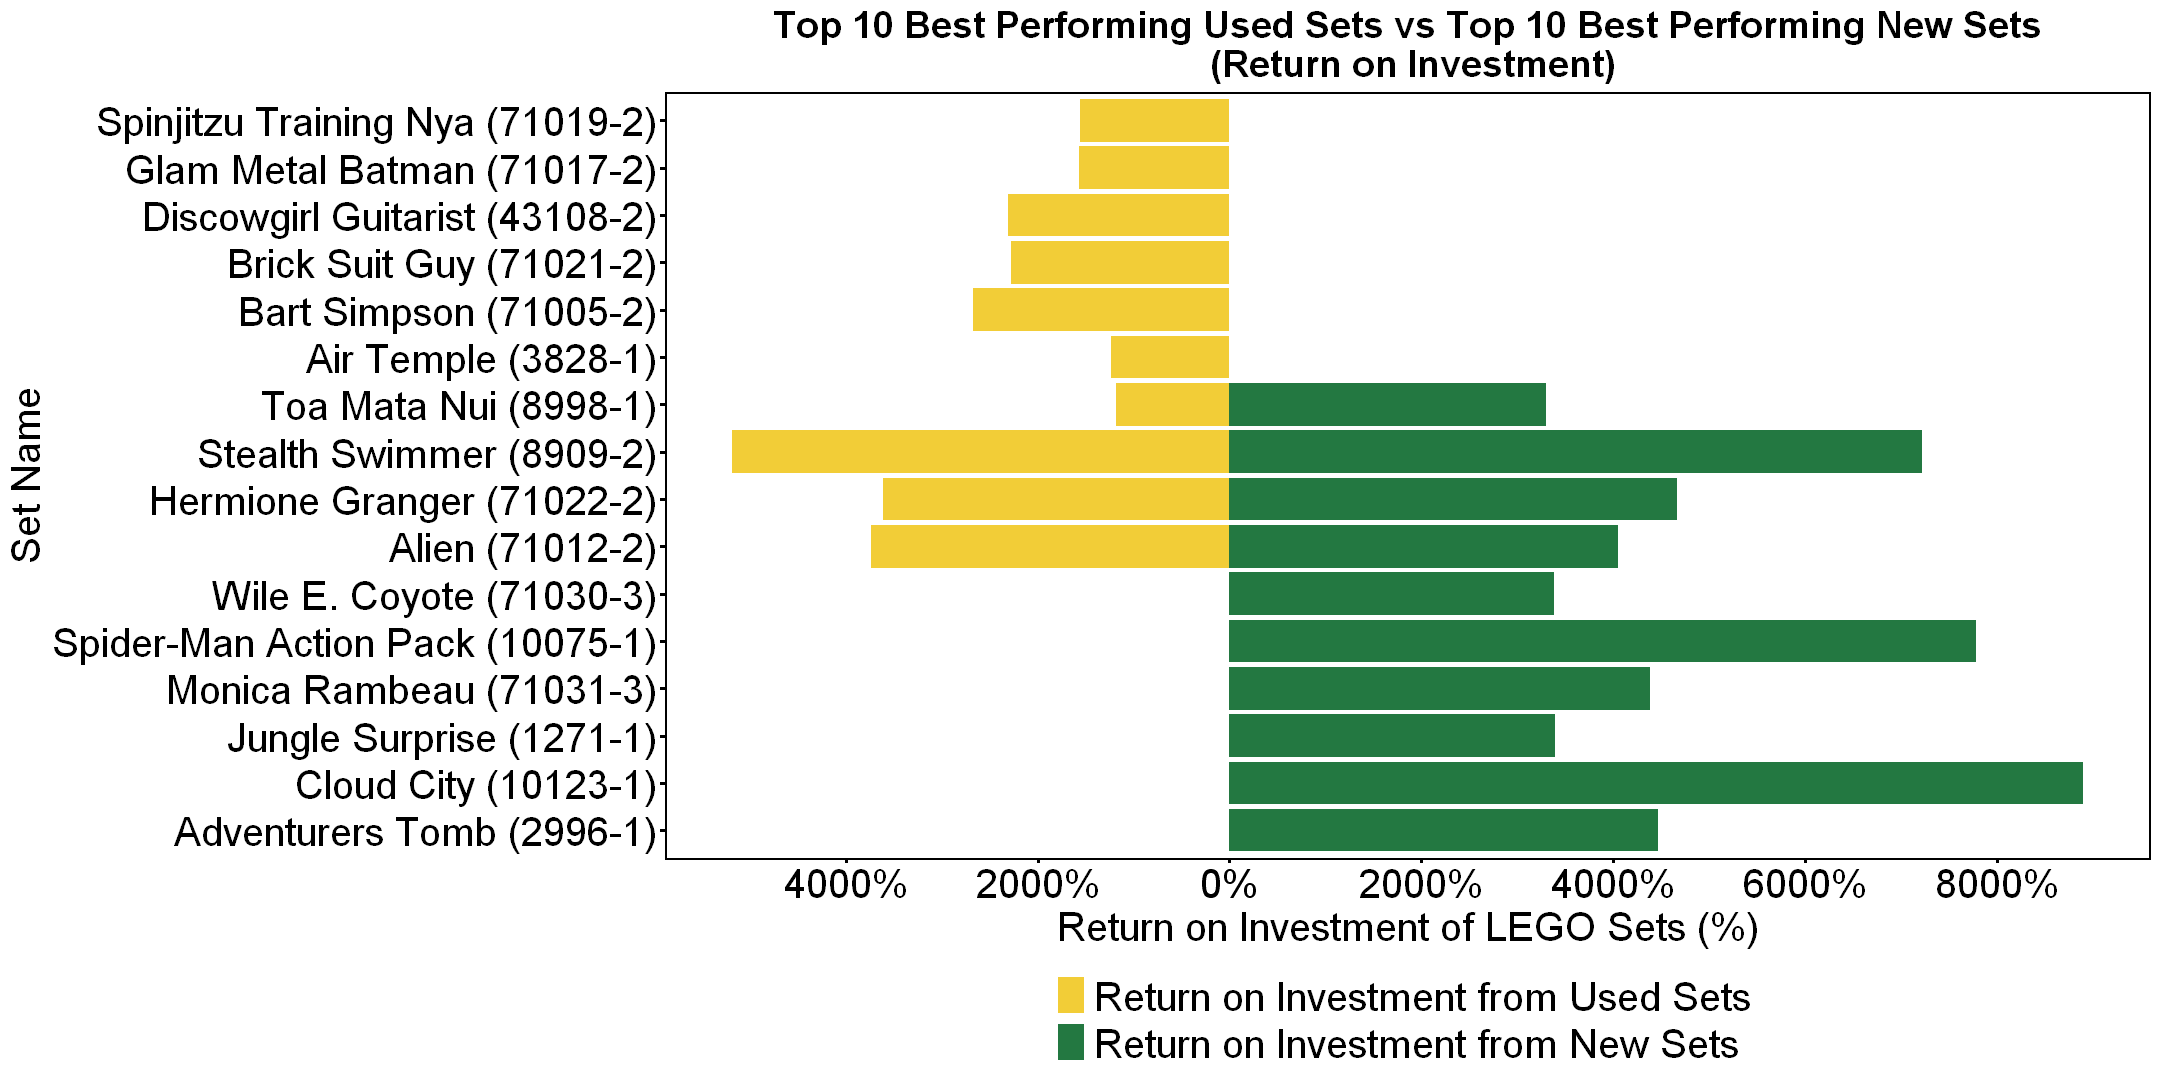

In [86]:
# Plot the Top 10 new LEGO set ROI VS Top 10 used LEGO set ROI
top_sets_rate_plot <- 
  used_new_sets_rate_data %>%
  ggplot(aes(y = reorder(set_name, desc(category)))) +
    geom_bar(aes(x = ifelse(category == "used", -used_rate, new_rate), 
                 fill = category), stat = "identity", linewidth = 0.5) +
    scale_fill_manual(values = c("used" = "#F2CD37", "x_new" = "#237841"),
                      labels = c("Return on Investment from Used Sets", "Return on Investment from New Sets")) +
    labs(title = "Top 10 Best Performing Used Sets vs Top 10 Best Performing New Sets\n (Return on Investment)",
         x = "Return on Investment of LEGO Sets (%)",
         y = "Set Name") +
    theme_minimal() +
    guides(fill = guide_legend(nrow = 2, byrow = TRUE)) +
    scale_x_continuous(breaks = c(seq(-8000, 0, by = 2000), 0, seq(2000, 10000, by = 2000)), 
                       labels = function(x) paste0(ifelse(x != 0, "", ""), abs(x), "%")) +  
    scale_y_discrete() + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.title = element_blank(),
          axis.text = element_text(size = 24, color = "black"),
          axis.title = element_text(size = 24),
          legend.text = element_text(size = 24),
          axis.ticks = element_line(size = 1), 
          plot.title = element_text(size = 22, hjust = 0.5, face = "bold"),
          panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
          axis.line = element_line(colour = "black", linewidth = 0.5),
          legend.position = "bottom")   
                       
top_sets_rate_plot

In [87]:
# Save the plot above
ggsave("top_sets_rate_plot.jpg", plot = top_sets_rate_plot, width = 19, height = 11, units = "in", dpi = 300)

In [88]:
# To find the used sets with lowest ROI
tail_used_sets_rate <-
  market_data %>%
  group_by(set_name) %>%
  arrange(used_rate) %>%
  select(year, theme_name, set_id, set_name, used_rate) %>%
  head(10)

tail_used_sets_rate

year,theme_name,set_id,set_name,used_rate
<dbl>,<chr>,<chr>,<chr>,<dbl>
2017,DC Super Hero Girls,41236-1,Harley Quinn Dorm,-99.39970
2022,Friends,41702-1,Canal Houseboat,-95.74947
2014,Friends,40112-1,Catwalk Phone Stand,-87.32488
2018,Duplo,10879-1,Gentle Giants Petting Zoo,-86.24312
2021,Vidiyo,43103-1,Punk Pirate BeatBox,-85.04252
2021,Friends,41681-1,Forest Camper Van and Sailboat,-84.27686
2022,Ninjago,70690-1,Jay's Spinjitzu Ninja Training,-83.98398
2013,Legends of Chima,70109-1,Whirling Vines,-83.25550
2019,Duplo,10908-1,Plane,-81.68168


In [89]:
# To find the new sets with lowest ROI
tail_new_sets_rate <-
  market_data %>%
  group_by(set_name) %>%
  arrange(new_rate) %>%
  select(year, theme_name, set_id, set_name, new_rate) %>%
  head(10)

tail_new_sets_rate

year,theme_name,set_id,set_name,new_rate
<dbl>,<chr>,<chr>,<chr>,<dbl>
2015,Dimensions,71170-1,Starter Pack: PS3,-78.66787
2015,Dimensions,71173-1,Starter Pack: Xbox 360,-72.45725
2016,Dimensions,71253-1,Fantastic Beasts and Where to Find Them: Play the Complete Movie,-65.95319
2017,Star Wars,75524-1,Chirrut Îmwe,-64.18567
2019,The LEGO Movie 2,70825-1,Queen Watevra's Build Whatever Box!,-62.39060
2021,Vidiyo,43105-1,Party Llama BeatBox,-61.48074
2017,Star Wars,75525-1,Baze Malbus,-60.98439
2021,Vidiyo,43103-1,Punk Pirate BeatBox,-60.83042
2015,Dimensions,71231-1,Unikitty Fun Pack,-60.24016


In [90]:
# Paste the set_id after the set_name
tail_used_sets_rate$set_name <- 
  paste0(tail_used_sets_rate$set_name, " (", tail_used_sets_rate$set_id, ")")
tail_used_sets_rate

year,theme_name,set_id,set_name,used_rate
<dbl>,<chr>,<chr>,<chr>,<dbl>
2017,DC Super Hero Girls,41236-1,Harley Quinn Dorm (41236-1),-99.39970
2022,Friends,41702-1,Canal Houseboat (41702-1),-95.74947
2014,Friends,40112-1,Catwalk Phone Stand (40112-1),-87.32488
2018,Duplo,10879-1,Gentle Giants Petting Zoo (10879-1),-86.24312
2021,Vidiyo,43103-1,Punk Pirate BeatBox (43103-1),-85.04252
2021,Friends,41681-1,Forest Camper Van and Sailboat (41681-1),-84.27686
2022,Ninjago,70690-1,Jay's Spinjitzu Ninja Training (70690-1),-83.98398
2013,Legends of Chima,70109-1,Whirling Vines (70109-1),-83.25550
2019,Duplo,10908-1,Plane (10908-1),-81.68168


In [91]:
# Paste the set_id after the set_name
tail_new_sets_rate$set_name <- 
  paste0(tail_new_sets_rate$set_name, " (", tail_new_sets_rate$set_id, ")")
tail_new_sets_rate

year,theme_name,set_id,set_name,new_rate
<dbl>,<chr>,<chr>,<chr>,<dbl>
2015,Dimensions,71170-1,Starter Pack: PS3 (71170-1),-78.66787
2015,Dimensions,71173-1,Starter Pack: Xbox 360 (71173-1),-72.45725
2016,Dimensions,71253-1,Fantastic Beasts and Where to Find Them: Play the Complete Movie (71253-1),-65.95319
2017,Star Wars,75524-1,Chirrut Îmwe (75524-1),-64.18567
2019,The LEGO Movie 2,70825-1,Queen Watevra's Build Whatever Box! (70825-1),-62.39060
2021,Vidiyo,43105-1,Party Llama BeatBox (43105-1),-61.48074
2017,Star Wars,75525-1,Baze Malbus (75525-1),-60.98439
2021,Vidiyo,43103-1,Punk Pirate BeatBox (43103-1),-60.83042
2015,Dimensions,71231-1,Unikitty Fun Pack (71231-1),-60.24016


In [92]:
# Merge two dataset: the used and new setw with lowest ROI 
used_new_sets_tail_data <- 
  bind_rows(
    mutate(tail_used_sets_rate, category = "used"),
    mutate(tail_new_sets_rate, category = "x_new")
  )
used_new_sets_tail_data

year,theme_name,set_id,set_name,used_rate,category,new_rate
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
2017,DC Super Hero Girls,41236-1,Harley Quinn Dorm (41236-1),-99.39970,used,NA
2022,Friends,41702-1,Canal Houseboat (41702-1),-95.74947,used,NA
2014,Friends,40112-1,Catwalk Phone Stand (40112-1),-87.32488,used,NA
2018,Duplo,10879-1,Gentle Giants Petting Zoo (10879-1),-86.24312,used,NA
2021,Vidiyo,43103-1,Punk Pirate BeatBox (43103-1),-85.04252,used,NA
2021,Friends,41681-1,Forest Camper Van and Sailboat (41681-1),-84.27686,used,NA
2022,Ninjago,70690-1,Jay's Spinjitzu Ninja Training (70690-1),-83.98398,used,NA
2013,Legends of Chima,70109-1,Whirling Vines (70109-1),-83.25550,used,NA
2019,Duplo,10908-1,Plane (10908-1),-81.68168,used,NA


In [93]:
# Save the dataset
write.csv(used_new_sets_tail_data, file = "used_new_sets_tail_data.csv", row.names = FALSE)

In [94]:
# To classify the themes these lowest sets coming from
loss_unique_sets <- 
  used_new_sets_tail_data %>%
  distinct(set_name, .keep_all = TRUE)

loss_theme_set_counts <- 
  loss_unique_sets %>%
  group_by(theme_name) %>%
  summarise(number_of_sets = n()) %>%
  arrange(desc(number_of_sets))

loss_theme_set_counts

theme_name,number_of_sets
<chr>,<int>
Dimensions,4
Friends,3
Vidiyo,3
Duplo,2
Star Wars,2
DC Super Hero Girls,1
Dots,1
Legends of Chima,1
Ninjago,1


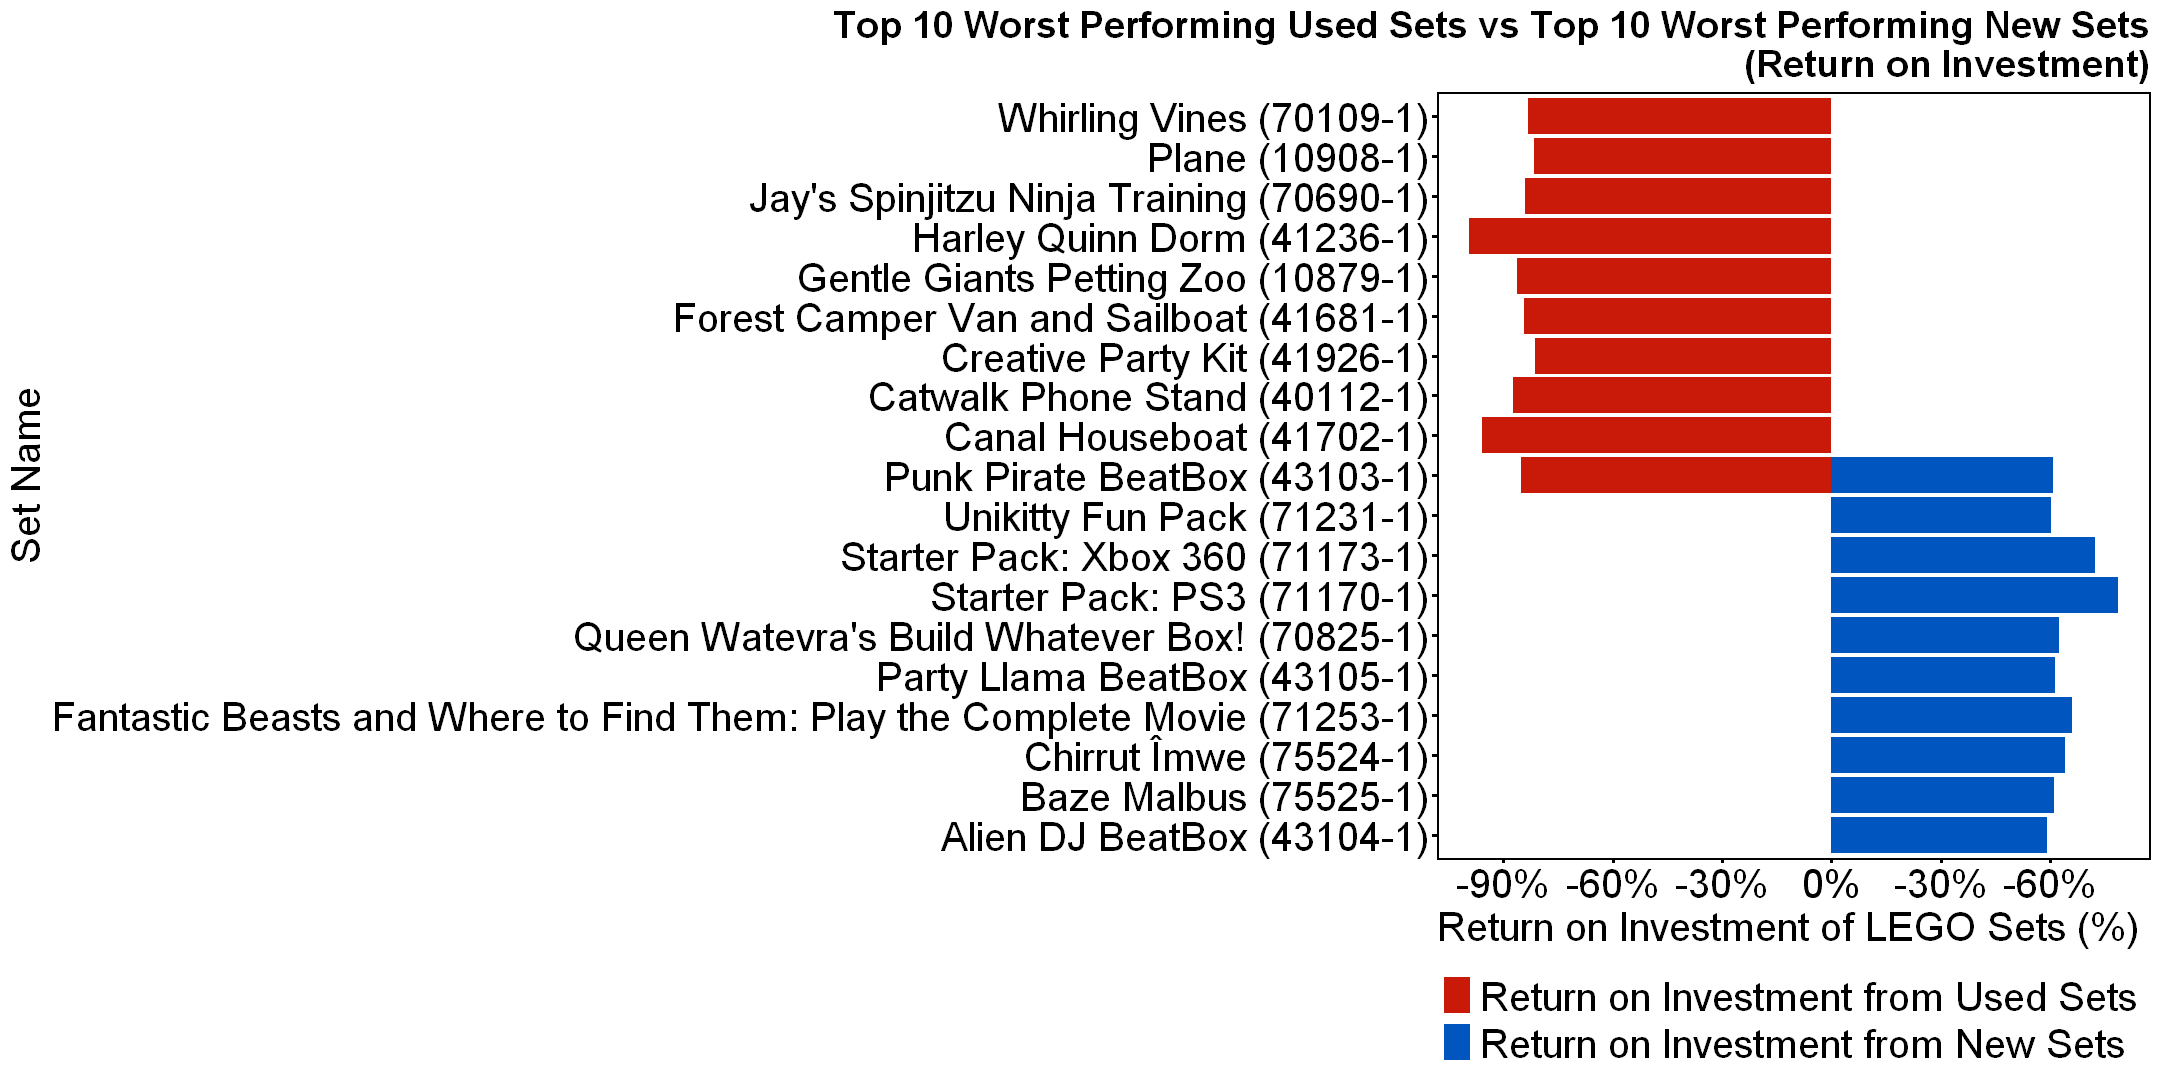

In [98]:
# Plot the top 10 worst performing new LEGO set ROI vs top 10 worst performing used LEGO ROI
tail_sets_rate_plot <- 
  used_new_sets_tail_data %>%
  ggplot(aes(y = reorder(set_name, desc(category)))) +
    geom_bar(aes(x = ifelse(category == "used", used_rate, -new_rate), 
                 fill = category), stat = "identity", linewidth = 0.5) +
    scale_fill_manual(values = c("used" = "#C91A09", "x_new" = "#0055BF"),
                      labels = c("Return on Investment from Used Sets", "Return on Investment from New Sets")) +
    labs(title = "Top 10 Worst Performing Used Sets vs Top 10 Worst Performing New Sets\n(Return on Investment)",
         x = "Return on Investment of LEGO Sets (%) ",
         y = "Set Name") +
    theme_minimal() +
    guides(fill = guide_legend(nrow = 2, byrow = TRUE)) +
    scale_x_continuous(breaks = c(seq(-120, 0, by = 30), 0, seq(30, 100, by = 30)), 
                       labels = function(x) paste0(ifelse(x != 0, "-", ""), abs(x), "%")) +  
    scale_y_discrete() + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.title = element_blank(),
          axis.text = element_text(size = 24, color = "black"),
          axis.title = element_text(size = 24),
          legend.text = element_text(size = 24),
          axis.ticks = element_line(size = 1), 
          plot.title = element_text(size = 22, hjust = 1, face = "bold"),
          panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
          axis.line = element_line(colour = "black", linewidth = 0.5),
          legend.position = "bottom")   
                       
tail_sets_rate_plot

In [101]:
# Save the plot above
ggsave("tail_sets_rate_plot.jpg", plot = tail_sets_rate_plot, width = 24, height = 12, units = "in", dpi = 300)

In [102]:
# To find the themes with highest ROI (used sets)
top_used_theme_rate <-
  market_data %>%
  group_by(theme_name) %>%
  summarise(avg_used_rate = mean(used_rate)) %>% 
  mutate(avg_used_rate = round(avg_used_rate)) %>% 
  arrange(desc(avg_used_rate)) %>%
  head(10)

In [103]:
# To find the themes with highest ROI, (new sets)
top_new_theme_rate <-
  market_data %>%
  group_by(theme_name) %>%
  summarise(avg_new_rate = mean(new_rate)) %>% 
  mutate(avg_new_rate = round(avg_new_rate)) %>%
  arrange(desc(avg_new_rate)) %>%
  head(10)

In [104]:
# Merge all the two datasets: theme for used and new sets with highest ROI
used_new_theme_rate_data <- 
  bind_rows(
    mutate(top_used_theme_rate, category = "used"),
    mutate(top_new_theme_rate, category = "x_new")
  )
used_new_theme_rate_data

theme_name,avg_used_rate,category,avg_new_rate
<chr>,<dbl>,<chr>,<dbl>
Avatar: The Last Airbender,934,used,NA
Spider-Man,422,used,NA
Batman,390,used,NA
Trains,315,used,NA
Western,269,used,NA
FORMA,261,used,NA
Model Team,259,used,NA
Vikings,234,used,NA
Adventurers,232,used,NA


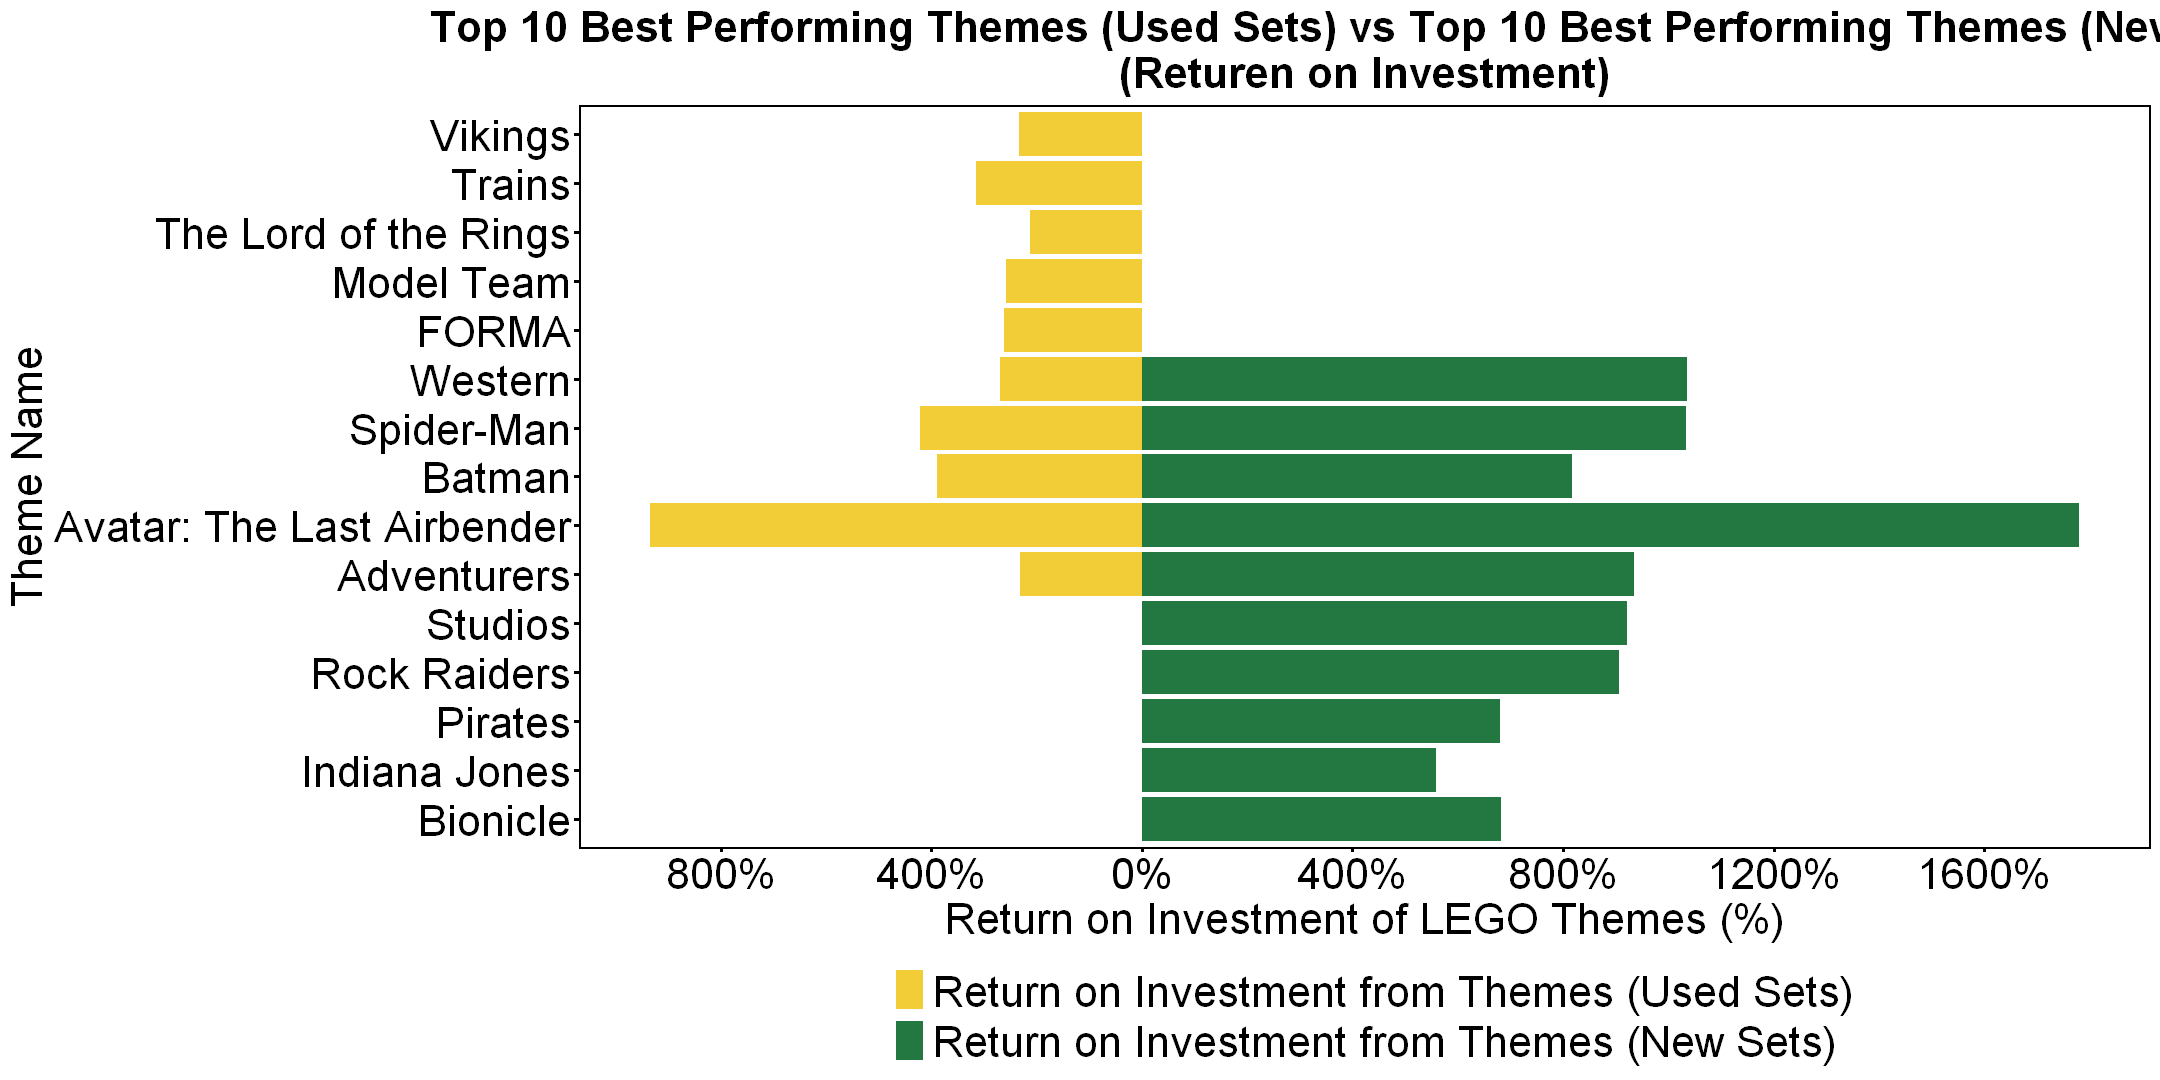

In [105]:
# Plot the Top 10 themes for used and new sets with highest ROI
top_theme_rate_plot <- 
  used_new_theme_rate_data %>%
  ggplot(aes(y = reorder(theme_name, desc(category)))) +
    geom_bar(aes(x = ifelse(category == "used", -avg_used_rate, avg_new_rate), 
                 fill = category), stat = "identity", linewidth = 0.5) +
    scale_fill_manual(values = c("used" = "#F2CD37", "x_new" = "#237841"),
                      labels = c("Return on Investment from Themes (Used Sets)", "Return on Investment from Themes (New Sets)")) +
    labs(title = "Top 10 Best Performing Themes (Used Sets) vs Top 10 Best Performing Themes (New Sets)\n(Returen on Investment)",
         x = "Return on Investment of LEGO Themes (%)",
         y = "Theme Name") +
    theme_minimal() +
    guides(fill = guide_legend(nrow = 2, byrow = TRUE)) +
    scale_x_continuous(breaks = c(seq(-800, 0, by = 400), 0, seq(400, 1600, by = 400)), 
                       labels = function(x) paste0(ifelse(x != 0, "", ""), abs(x), "%")) +  
    scale_y_discrete() + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.title = element_blank(),
          axis.text = element_text(size = 26, color = "black"),
          axis.title = element_text(size = 26),
          legend.text = element_text(size = 26),
          axis.ticks = element_line(size = 1), 
          plot.title = element_text(size = 26, hjust = 0.5, face = "bold"),
          panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
          axis.line = element_line(colour = "black", linewidth = 0.5),
          legend.position = "bottom")   
                       
top_theme_rate_plot

In [106]:
# Save the plot above
ggsave("top_theme_rate_plot.jpg", plot = top_theme_rate_plot, width = 22, height = 14, units = "in", dpi = 300)

In [107]:
# To find the themes for used sets with lowest ROI
tail_used_theme_rate <-
  market_data %>%
  group_by(theme_name) %>%
  summarise(avg_used_rate = mean(used_rate)) %>% 
  mutate(avg_used_rate = round(avg_used_rate)) %>% 
  arrange(avg_used_rate) %>%
  filter (avg_used_rate < 0) %>%
  head(10)

In [108]:
# To find the themes for new sets with lowest ROI
tail_new_theme_rate <-
  market_data %>%
  group_by(theme_name) %>%
  summarise(avg_new_rate = mean(new_rate)) %>% 
  mutate(avg_new_rate = round(avg_new_rate)) %>% 
  arrange(avg_new_rate) %>%
  filter (avg_new_rate < 0) %>%
  head(10)

In [109]:
# Merge two datasets: themes for used and new sets with lowest ROI
tail_used_new_theme_rate_data <- 
  bind_rows(
    mutate(tail_used_theme_rate, category = "used"),
    mutate(tail_new_theme_rate, category = "x_new")
  ) 
tail_used_new_theme_rate_data

theme_name,avg_used_rate,category,avg_new_rate
<chr>,<dbl>,<chr>,<dbl>
Fusion,-67,used,NA
Make and Create,-54,used,NA
Dots,-52,used,NA
Trolls World Tour,-48,used,NA
World Racers,-44,used,NA
Monkie Kid,-42,used,NA
Unikitty,-42,used,NA
Friends,-41,used,NA
Brick Sketches,-40,used,NA


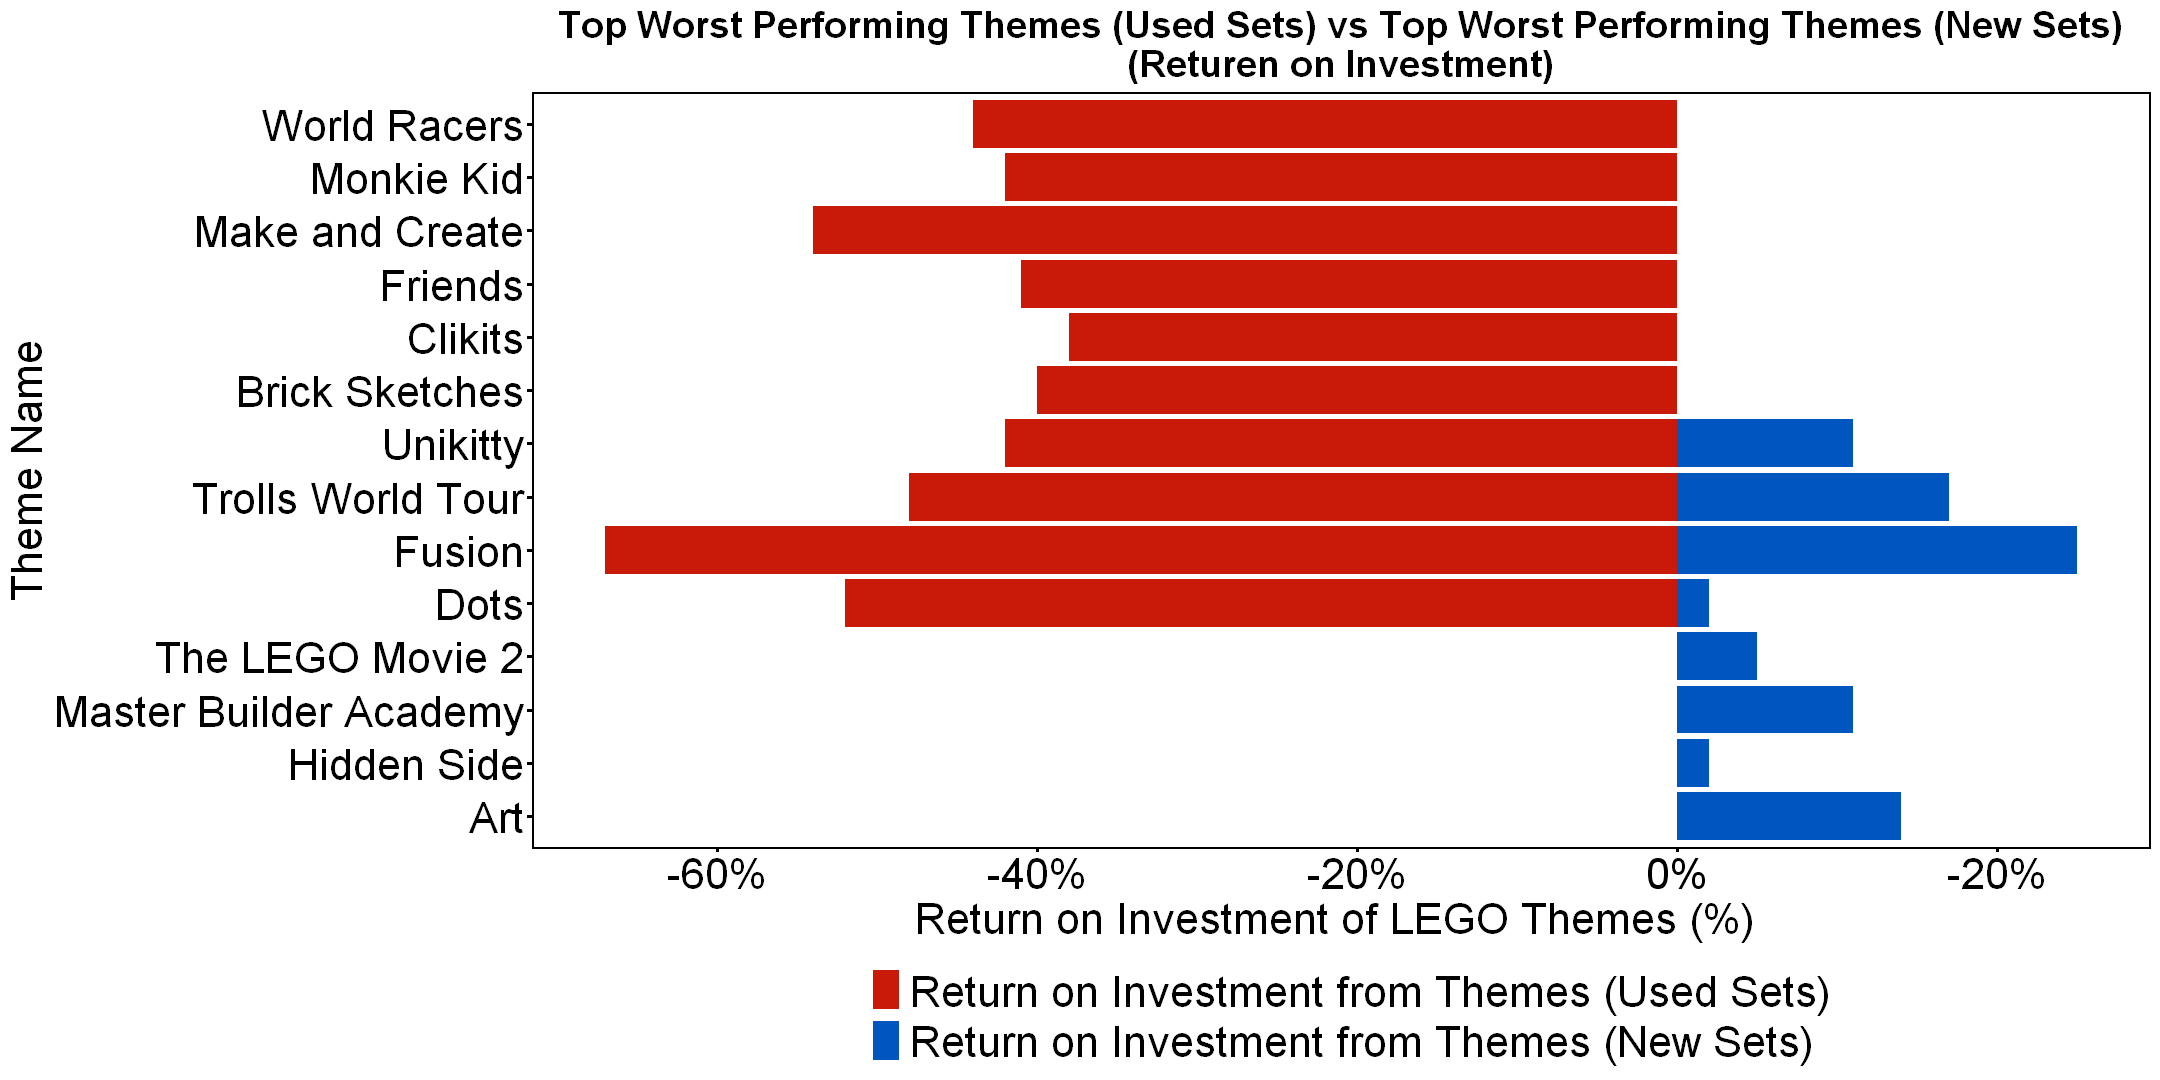

In [110]:
# Plot the Top 10 themes for used and new sets with lowest ROI
tail_theme_rate_plot <- 
  tail_used_new_theme_rate_data %>%
  ggplot(aes(y = reorder(theme_name, desc(category)))) +
    geom_bar(aes(x = ifelse(category == "used", avg_used_rate, -avg_new_rate), 
                 fill = category), stat = "identity", linewidth = 0.5) +
    scale_fill_manual(values = c("used" = "#C91A09", "x_new" = "#0055BF"),
                      labels = c("Return on Investment from Themes (Used Sets)", "Return on Investment from Themes (New Sets)")) +
    labs(title = "Top Worst Performing Themes (Used Sets) vs Top Worst Performing Themes (New Sets)\n(Returen on Investment)",
         x = "Return on Investment of LEGO Themes (%) ",
         y = "Theme Name") +
    theme_minimal() +
    guides(fill = guide_legend(nrow = 2, byrow = TRUE)) +
    scale_x_continuous(breaks = c(seq(-120, 0, by = 20), 0, seq(20, 100, by = 20)), 
                       labels = function(x) paste0(ifelse(x != 0, "-", ""), abs(x), "%")) +  
    scale_y_discrete() + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.title = element_blank(),
          axis.text = element_text(size = 26, color = "black"),
          axis.title = element_text(size = 26),
          legend.text = element_text(size = 26),
          axis.ticks = element_line(size = 1), 
          plot.title = element_text(size = 22, hjust = 0.5, face = "bold"),
          panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
          axis.line = element_line(colour = "black", linewidth = 0.5),
          legend.position = "bottom")   
                       
tail_theme_rate_plot

In [111]:
# Save the plot above
ggsave("tail_theme_rate_plot.jpg", plot = tail_theme_rate_plot, width = 19, height = 12, units = "in", dpi = 300)

In [112]:
# To find the used sets with highest Net Profit
top_used_sets_profit <-
  market_data %>%
  group_by(set_name) %>%
  arrange(desc(used_set_profit)) %>%
  select(year, theme_name, set_id, set_name, used_set_profit) %>%
  head(10)

top_used_sets_profit

year,theme_name,set_id,set_name,used_set_profit
<dbl>,<chr>,<chr>,<chr>,<dbl>
2005,Star Wars,10143-1,Death Star II,1070.20
2008,Icons,10185-1,Green Grocer,840.80
2003,Star Wars,10123-1,Cloud City,825.00
2002,Star Wars,10030-1,Imperial Star Destroyer,786.20
2007,Icons,10182-1,Cafe Corner,737.93
2010,Icons,10210-1,Imperial Flagship,597.63
2009,Bionicle,8998-1,Toa Mata Nui,591.69
2009,Star Wars,10195-1,Republic Dropship with AT-OT,568.95
2012,Icons,10224-1,Town Hall,485.21


In [113]:
# Paste the set_id after set_name
top_used_sets_profit$set_name <- 
  paste0(top_used_sets_profit$set_name, " (", top_used_sets_profit$set_id, ")")

top_used_sets_profit

year,theme_name,set_id,set_name,used_set_profit
<dbl>,<chr>,<chr>,<chr>,<dbl>
2005,Star Wars,10143-1,Death Star II (10143-1),1070.20
2008,Icons,10185-1,Green Grocer (10185-1),840.80
2003,Star Wars,10123-1,Cloud City (10123-1),825.00
2002,Star Wars,10030-1,Imperial Star Destroyer (10030-1),786.20
2007,Icons,10182-1,Cafe Corner (10182-1),737.93
2010,Icons,10210-1,Imperial Flagship (10210-1),597.63
2009,Bionicle,8998-1,Toa Mata Nui (8998-1),591.69
2009,Star Wars,10195-1,Republic Dropship with AT-OT (10195-1),568.95
2012,Icons,10224-1,Town Hall (10224-1),485.21


In [114]:
# To find the new setw with highest Net Profit
top_new_sets_profit <-
  market_data %>%
  group_by(set_name) %>%
  arrange(desc(new_set_profit)) %>%
  select(year, theme_name, set_id, set_name, new_set_profit) %>%
  head(10)

top_new_sets_profit

year,theme_name,set_id,set_name,new_set_profit
<dbl>,<chr>,<chr>,<chr>,<dbl>
2003,Star Wars,10123-1,Cloud City,8900.00
2001,Star Wars,10018-1,Darth Maul,3050.01
2005,Star Wars,10143-1,Death Star II,2747.08
2002,Star Wars,10030-1,Imperial Star Destroyer,2197.67
2007,Icons,10182-1,Cafe Corner,2061.49
2007,Star Wars,10179-1,Ultimate Collector's Millennium Falcon,1665.02
2009,Bionicle,8998-1,Toa Mata Nui,1653.06
2008,Icons,10185-1,Green Grocer,1592.27
2017,Minecraft,21137-1,The Mountain Cave,1531.49


In [115]:
# Paste the set_id after set_name
top_new_sets_profit$set_name <- 
  paste0(top_new_sets_profit$set_name, " (", top_new_sets_profit$set_id, ")")

top_new_sets_profit

year,theme_name,set_id,set_name,new_set_profit
<dbl>,<chr>,<chr>,<chr>,<dbl>
2003,Star Wars,10123-1,Cloud City (10123-1),8900.00
2001,Star Wars,10018-1,Darth Maul (10018-1),3050.01
2005,Star Wars,10143-1,Death Star II (10143-1),2747.08
2002,Star Wars,10030-1,Imperial Star Destroyer (10030-1),2197.67
2007,Icons,10182-1,Cafe Corner (10182-1),2061.49
2007,Star Wars,10179-1,Ultimate Collector's Millennium Falcon (10179-1),1665.02
2009,Bionicle,8998-1,Toa Mata Nui (8998-1),1653.06
2008,Icons,10185-1,Green Grocer (10185-1),1592.27
2017,Minecraft,21137-1,The Mountain Cave (21137-1),1531.49


In [116]:
# Merge two datasets: used and new sets with highest Net Profit
used_new_sets_profit_data <- 
  bind_rows(
    mutate(top_used_sets_profit, category = "used"),
    mutate(top_new_sets_profit, category = "x_new")
  )
used_new_sets_profit_data

year,theme_name,set_id,set_name,used_set_profit,category,new_set_profit
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
2005,Star Wars,10143-1,Death Star II (10143-1),1070.20,used,NA
2008,Icons,10185-1,Green Grocer (10185-1),840.80,used,NA
2003,Star Wars,10123-1,Cloud City (10123-1),825.00,used,NA
2002,Star Wars,10030-1,Imperial Star Destroyer (10030-1),786.20,used,NA
2007,Icons,10182-1,Cafe Corner (10182-1),737.93,used,NA
2010,Icons,10210-1,Imperial Flagship (10210-1),597.63,used,NA
2009,Bionicle,8998-1,Toa Mata Nui (8998-1),591.69,used,NA
2009,Star Wars,10195-1,Republic Dropship with AT-OT (10195-1),568.95,used,NA
2012,Icons,10224-1,Town Hall (10224-1),485.21,used,NA


In [117]:
# To classify the themes where these sets from
unique_data <- 
  used_new_sets_profit_data %>% 
  distinct(theme_name, set_id, set_name, .keep_all = TRUE)

theme_set_counts <- 
  unique_data %>%
  group_by(theme_name) %>%
  summarise(set_count = n()) %>%
  arrange(desc(set_count))

theme_set_counts

theme_name,set_count
<chr>,<int>
Star Wars,6
Icons,5
Bionicle,1
Minecraft,1
Trains,1


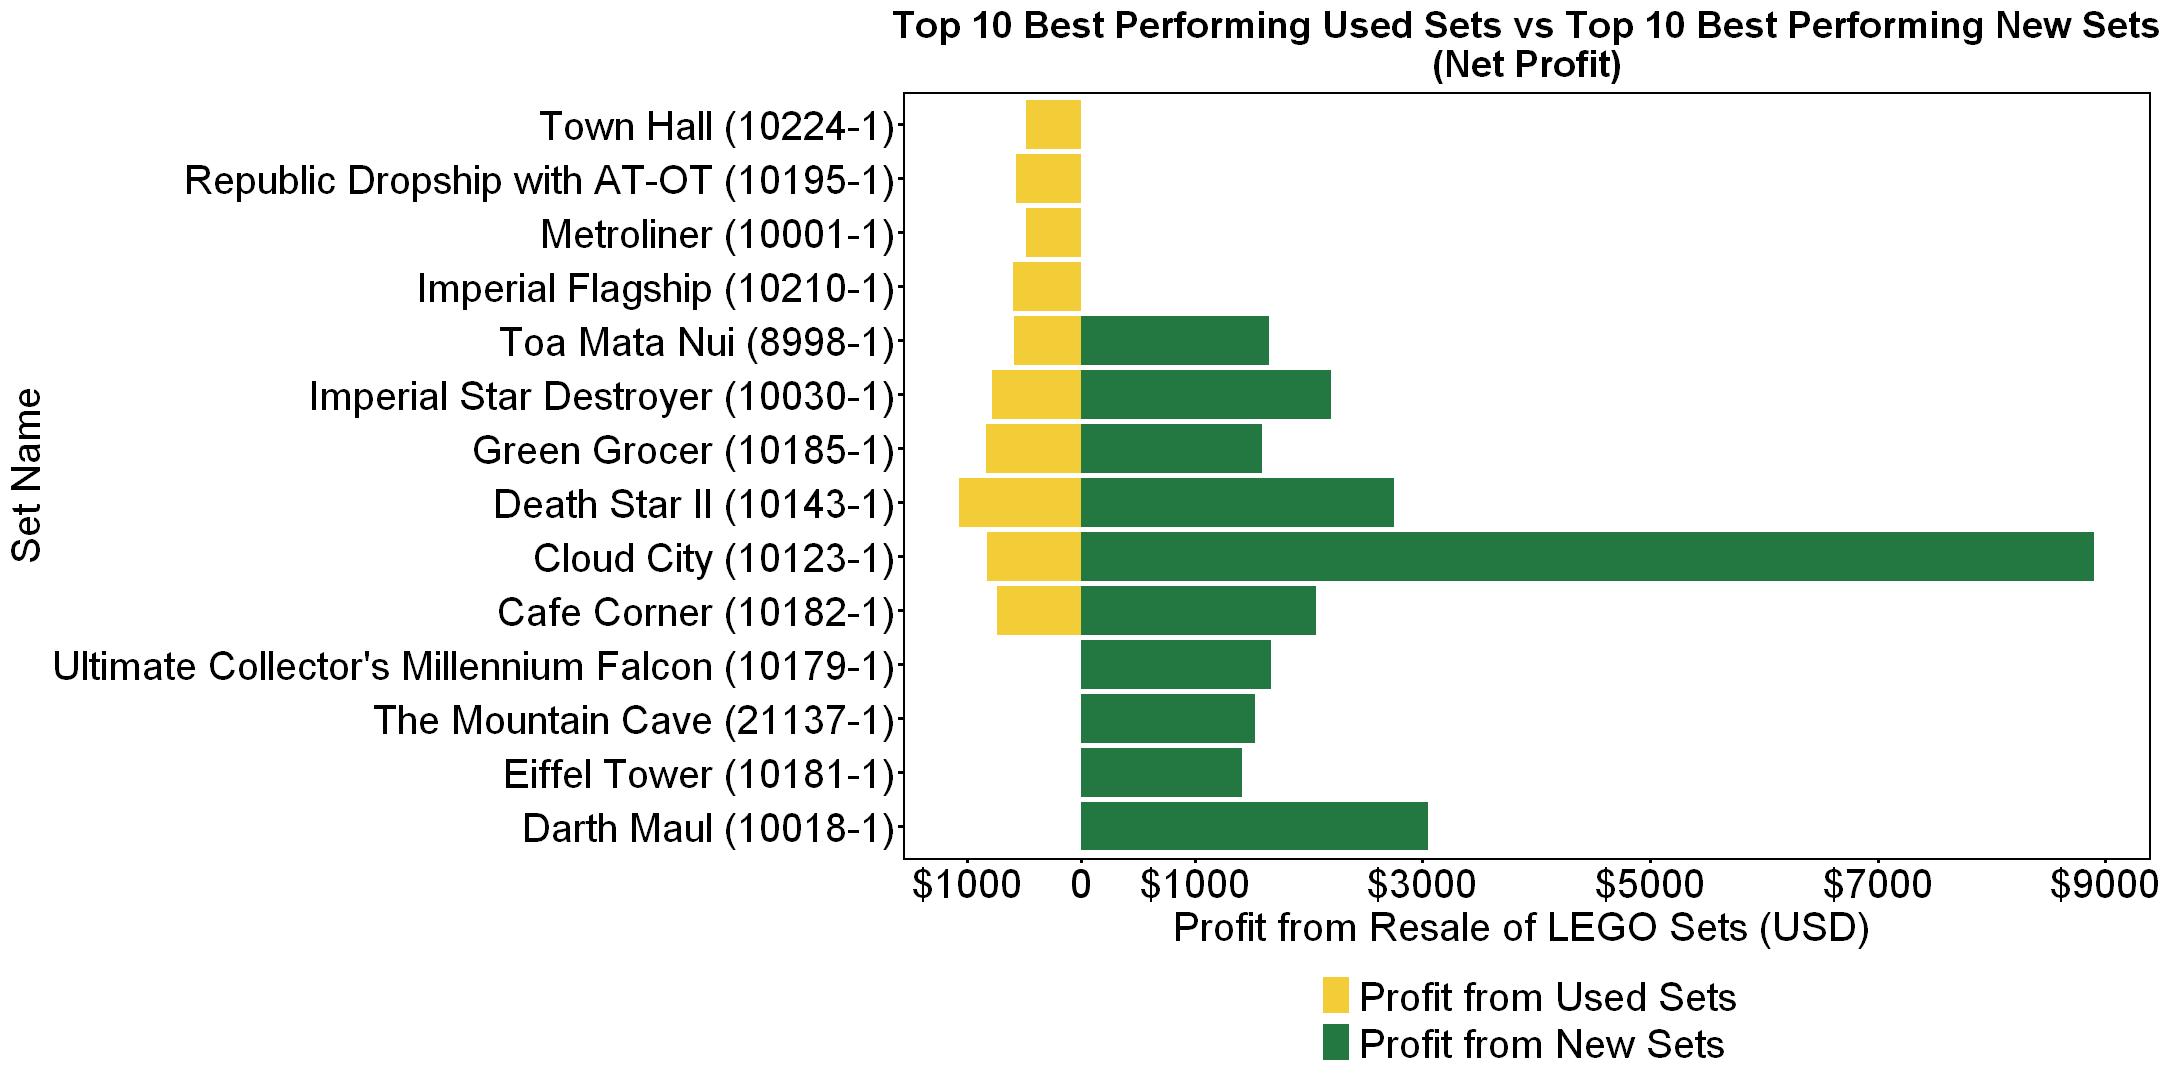

In [118]:
# Plot the Top 10 new LEGO set profit VS Top 10 used LEGO set profit
top_sets_profit_plot <- 
  used_new_sets_profit_data %>%
  # Change the unit of uesd_set_profit to k
  mutate(used_set_profit_k = used_set_profit / 1000,
         new_set_profit_k = new_set_profit / 1000) %>%
  ggplot(aes(y = reorder(set_name, desc(category)))) +
    geom_bar(aes(x = ifelse(category == "used", -used_set_profit_k, new_set_profit_k), 
                 fill = category), stat = "identity", linewidth = 0.5) +
    scale_fill_manual(values = c("used" = "#F2CD37", "x_new" = "#237841"),
                      labels = c("Profit from Used Sets", "Profit from New Sets")) +
    labs(title = "Top 10 Best Performing Used Sets vs Top 10 Best Performing New Sets\n(Net Profit)",
         x = "Profit from Resale of LEGO Sets (USD) ",
         y = "Set Name") +
    theme_minimal() +
    guides(fill = guide_legend(nrow = 2, byrow = TRUE)) +
    scale_x_continuous(breaks = c(seq(-1, 0, by = 1), 0, seq(1, 10, by = 2)), 
                       labels = function(x) ifelse(x != 0, paste0("$", abs(x), "000"), as.character(x))) +  
    scale_y_discrete() + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.title = element_blank(),
          axis.text = element_text(size = 24, color = "black"),
          axis.title = element_text(size = 24),
          legend.text = element_text(size = 24),
          axis.ticks = element_line(size = 1), 
          plot.title = element_text(size = 22, hjust = 0.5, face = "bold"),
          panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
          axis.line = element_line(colour = "black", linewidth = 0.5),
          legend.position = "bottom")   
                       
top_sets_profit_plot

In [119]:
# Save the plot above
ggsave("top_sets_profit_plot.jpg", plot = top_sets_profit_plot, width = 20, height = 12, units = "in", dpi = 300)

In [120]:
# To find the sets with highest sets 
top_used_sets_loss <-
  market_data %>%
  group_by(set_name) %>%
  arrange(used_set_profit) %>%
  select(theme_name, set_id, set_name, used_set_profit) %>%
  head(10)

top_used_sets_loss

theme_name,set_id,set_name,used_set_profit
<chr>,<chr>,<chr>,<dbl>
Mindstorms,8527-1,Mindstorms NXT,-133.21
Icons,10284-1,Camp Nou - FC Barcelona,-123.18
Icons,10234-1,Sydney Opera House,-120.96
Technic,42083-1,Bugatti Chiron,-118.52
Icons,10256-1,Taj Mahal,-117.33
Mindstorms,8547-1,Mindstorms NXT 2.0,-111.57
Disney,71040-1,Disney Castle,-107.65
Education,45002-1,Tech Machines Set,-97.00
Icons,10272-1,Old Trafford - Manchester United,-88.70


In [121]:
# Paste the set_id after set_name
top_used_sets_loss$set_name <- 
  paste0(top_used_sets_loss$set_name, " (", top_used_sets_loss$set_id, ")")

top_used_sets_loss

theme_name,set_id,set_name,used_set_profit
<chr>,<chr>,<chr>,<dbl>
Mindstorms,8527-1,Mindstorms NXT (8527-1),-133.21
Icons,10284-1,Camp Nou - FC Barcelona (10284-1),-123.18
Icons,10234-1,Sydney Opera House (10234-1),-120.96
Technic,42083-1,Bugatti Chiron (42083-1),-118.52
Icons,10256-1,Taj Mahal (10256-1),-117.33
Mindstorms,8547-1,Mindstorms NXT 2.0 (8547-1),-111.57
Disney,71040-1,Disney Castle (71040-1),-107.65
Education,45002-1,Tech Machines Set (45002-1),-97.00
Icons,10272-1,Old Trafford - Manchester United (10272-1),-88.70


In [122]:
top_new_sets_loss <-
  market_data %>%
  group_by(set_name) %>%
  arrange(new_set_profit) %>%
  select(theme_name, set_id, set_name, new_set_profit) %>%
  head(10)

top_new_sets_loss

theme_name,set_id,set_name,new_set_profit
<chr>,<chr>,<chr>,<dbl>
Dimensions,71170-1,Starter Pack: PS3,-78.66
Dimensions,71173-1,Starter Pack: Xbox 360,-72.45
Technic,42070-1,6x6 All Terrain Tow Truck,-58.33
City,60197-1,Passenger Train,-54.26
Icons,10284-1,Camp Nou - FC Barcelona,-52.67
The LEGO Movie 2,70835-1,Rex's Rexplorer!,-51.28
Vidiyo,43115-1,The Boombox,-47.64
Technic,42114-1,6x6 Volvo Articulated Hauler,-44.61
Education,45002-1,Tech Machines Set,-43.77


In [123]:
top_new_sets_loss$set_name <- 
  paste0(top_new_sets_loss$set_name, " (", top_new_sets_loss$set_id, ")")

top_new_sets_loss

theme_name,set_id,set_name,new_set_profit
<chr>,<chr>,<chr>,<dbl>
Dimensions,71170-1,Starter Pack: PS3 (71170-1),-78.66
Dimensions,71173-1,Starter Pack: Xbox 360 (71173-1),-72.45
Technic,42070-1,6x6 All Terrain Tow Truck (42070-1),-58.33
City,60197-1,Passenger Train (60197-1),-54.26
Icons,10284-1,Camp Nou - FC Barcelona (10284-1),-52.67
The LEGO Movie 2,70835-1,Rex's Rexplorer! (70835-1),-51.28
Vidiyo,43115-1,The Boombox (43115-1),-47.64
Technic,42114-1,6x6 Volvo Articulated Hauler (42114-1),-44.61
Education,45002-1,Tech Machines Set (45002-1),-43.77


In [124]:
used_new_sets_loss_data <- 
  bind_rows(
    mutate(top_used_sets_loss, category = "used"),
    mutate(top_new_sets_loss, category = "x_new")
  )
used_new_sets_loss_data

theme_name,set_id,set_name,used_set_profit,category,new_set_profit
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
Mindstorms,8527-1,Mindstorms NXT (8527-1),-133.21,used,NA
Icons,10284-1,Camp Nou - FC Barcelona (10284-1),-123.18,used,NA
Icons,10234-1,Sydney Opera House (10234-1),-120.96,used,NA
Technic,42083-1,Bugatti Chiron (42083-1),-118.52,used,NA
Icons,10256-1,Taj Mahal (10256-1),-117.33,used,NA
Mindstorms,8547-1,Mindstorms NXT 2.0 (8547-1),-111.57,used,NA
Disney,71040-1,Disney Castle (71040-1),-107.65,used,NA
Education,45002-1,Tech Machines Set (45002-1),-97.00,used,NA
Icons,10272-1,Old Trafford - Manchester United (10272-1),-88.70,used,NA


In [125]:
unique_loss_data <- 
  used_new_sets_loss_data %>% 
  distinct(theme_name, set_name, .keep_all = TRUE)


theme_loss_set_counts <- 
  unique_loss_data %>%
  group_by(theme_name) %>%
  summarise(set_count = n()) %>%
  arrange(desc(set_count))

theme_loss_set_counts

theme_name,set_count
<chr>,<int>
Icons,4
Technic,4
Dimensions,2
Mindstorms,2
City,1
Disney,1
Education,1
The LEGO Movie 2,1
Vidiyo,1


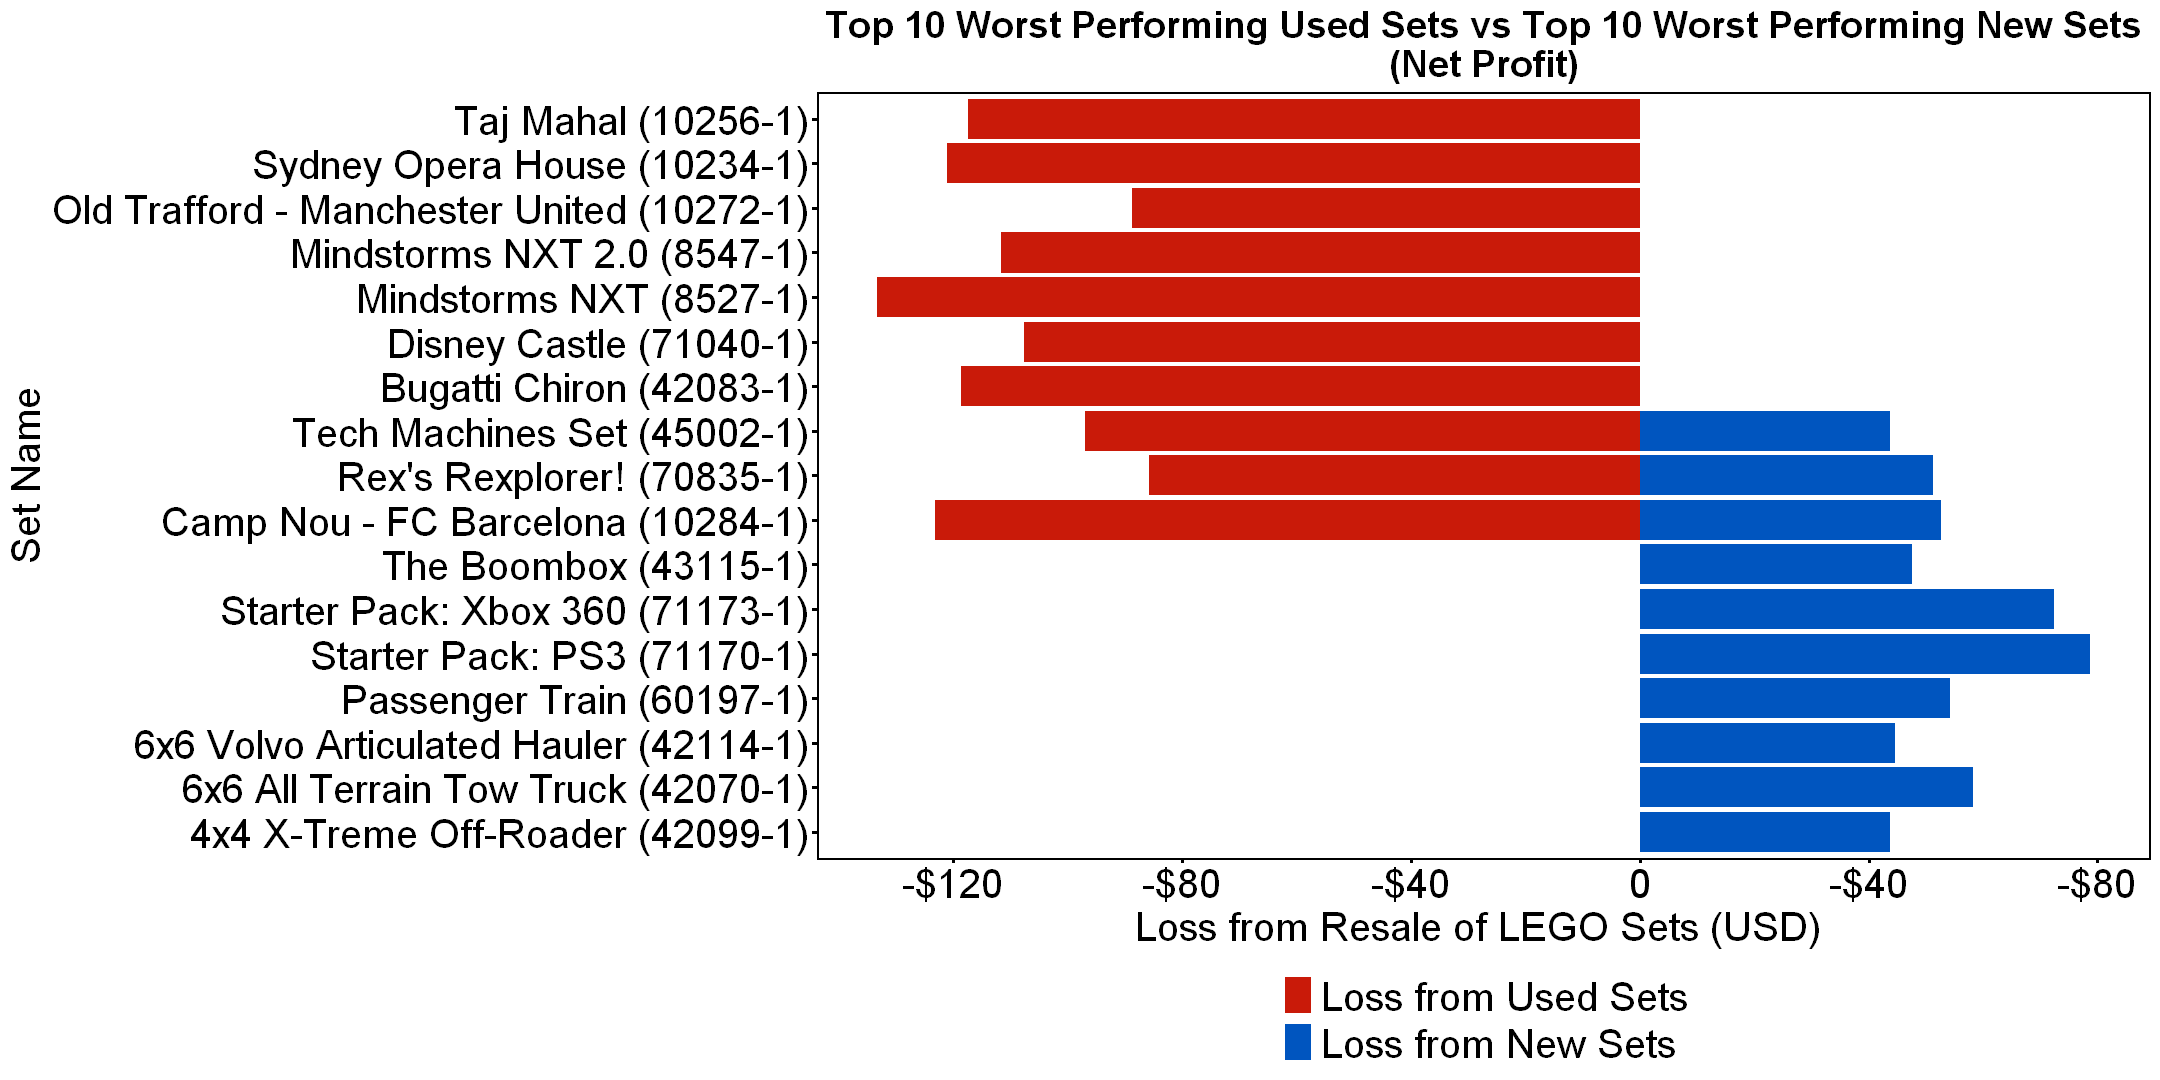

In [126]:
# Plot the Top 10 new LEGO set profit VS Top 10 used LEGO set profit
top_sets_loss_plot <- 
  used_new_sets_loss_data %>%
    # Change the unit of uesd_set_profit to k
  ggplot(aes(y = reorder(set_name, desc(category)))) +
    geom_bar(aes(x = ifelse(category == "used", used_set_profit, -new_set_profit), 
                 fill = category), stat = "identity", linewidth = 0.5) +
    scale_fill_manual(values = c("used" = "#C91A09", "x_new" = "#0055BF"),
                      labels = c("Loss from Used Sets", "Loss from New Sets")) +
    labs(title = "Top 10 Worst Performing Used Sets vs Top 10 Worst Performing New Sets\n(Net Profit)",
         x = "Loss from Resale of LEGO Sets (USD) ",
         y = "Set Name") +
    theme_minimal() +
    guides(fill = guide_legend(nrow = 2, byrow = TRUE)) +
    scale_x_continuous(breaks = c(seq(-120, 0, by = 40), 0, seq(40, 100, by = 40)), 
                       labels = function(x) ifelse(x != 0, paste0("-$", abs(x)), as.character(x))) +  
    scale_y_discrete() + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.title = element_blank(),
          axis.text = element_text(size = 24, color = "black"),
          axis.title = element_text(size = 24),
          legend.text = element_text(size = 24),
          axis.ticks = element_line(size = 1), 
          plot.title = element_text(size = 22, hjust = 0.5, face = "bold"),
          panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
          axis.line = element_line(colour = "black", linewidth = 0.5),
          legend.position = "bottom")   
                       
top_sets_loss_plot

In [127]:
# Save the plot above
ggsave("top_sets_loss_plot.jpg", plot = top_sets_loss_plot, width = 19, height = 11, units = "in", dpi = 300)

In [128]:
# Find the top 10 themes with highest profit (used sets)
top_used_themes_profit <-
  market_data %>%
  group_by(theme_name) %>%
  summarise(average_used_profit = mean(used_set_profit)) %>%
  arrange(desc(average_used_profit)) %>%
  head(10)

top_used_themes_profit

theme_name,average_used_profit
<chr>,<dbl>
Avatar: The Last Airbender,344.01000
Model Team,176.92500
Batman,142.76538
Trains,135.42455
The Lord of the Rings,120.65000
Icons,119.82627
Spider-Man,107.36625
Pirates of the Caribbean,103.65200
The Simpsons,96.80000


In [129]:
# Find the top 10 themes with highest profit (new sets)
top_new_themes_profit <-
  market_data %>%
  group_by(theme_name) %>%
  summarise(average_new_profit = mean(new_set_profit)) %>%
  arrange(desc(average_new_profit)) %>%
  head(10)

top_new_themes_profit

theme_name,average_new_profit
<chr>,<dbl>
Avatar: The Last Airbender,713.2000
Pirates,348.5300
Icons,312.2551
Western,291.7475
Batman,291.1700
Model Team,274.5500
Trains,271.6305
Spider-Man,265.0375
Pirates of the Caribbean,227.6740


In [130]:
# Merge top 10 profit of new sets and used sets
# Creat a new variable "category" to distinguish whether the profit belongs to new set or used set
used_new_themes_profit_data <- 
  bind_rows(
    mutate(top_used_themes_profit, category = "used"),
    mutate(top_new_themes_profit, category = "x_new")
  )

used_new_themes_profit_data

theme_name,average_used_profit,category,average_new_profit
<chr>,<dbl>,<chr>,<dbl>
Avatar: The Last Airbender,344.01000,used,NA
Model Team,176.92500,used,NA
Batman,142.76538,used,NA
Trains,135.42455,used,NA
The Lord of the Rings,120.65000,used,NA
Icons,119.82627,used,NA
Spider-Man,107.36625,used,NA
Pirates of the Caribbean,103.65200,used,NA
The Simpsons,96.80000,used,NA


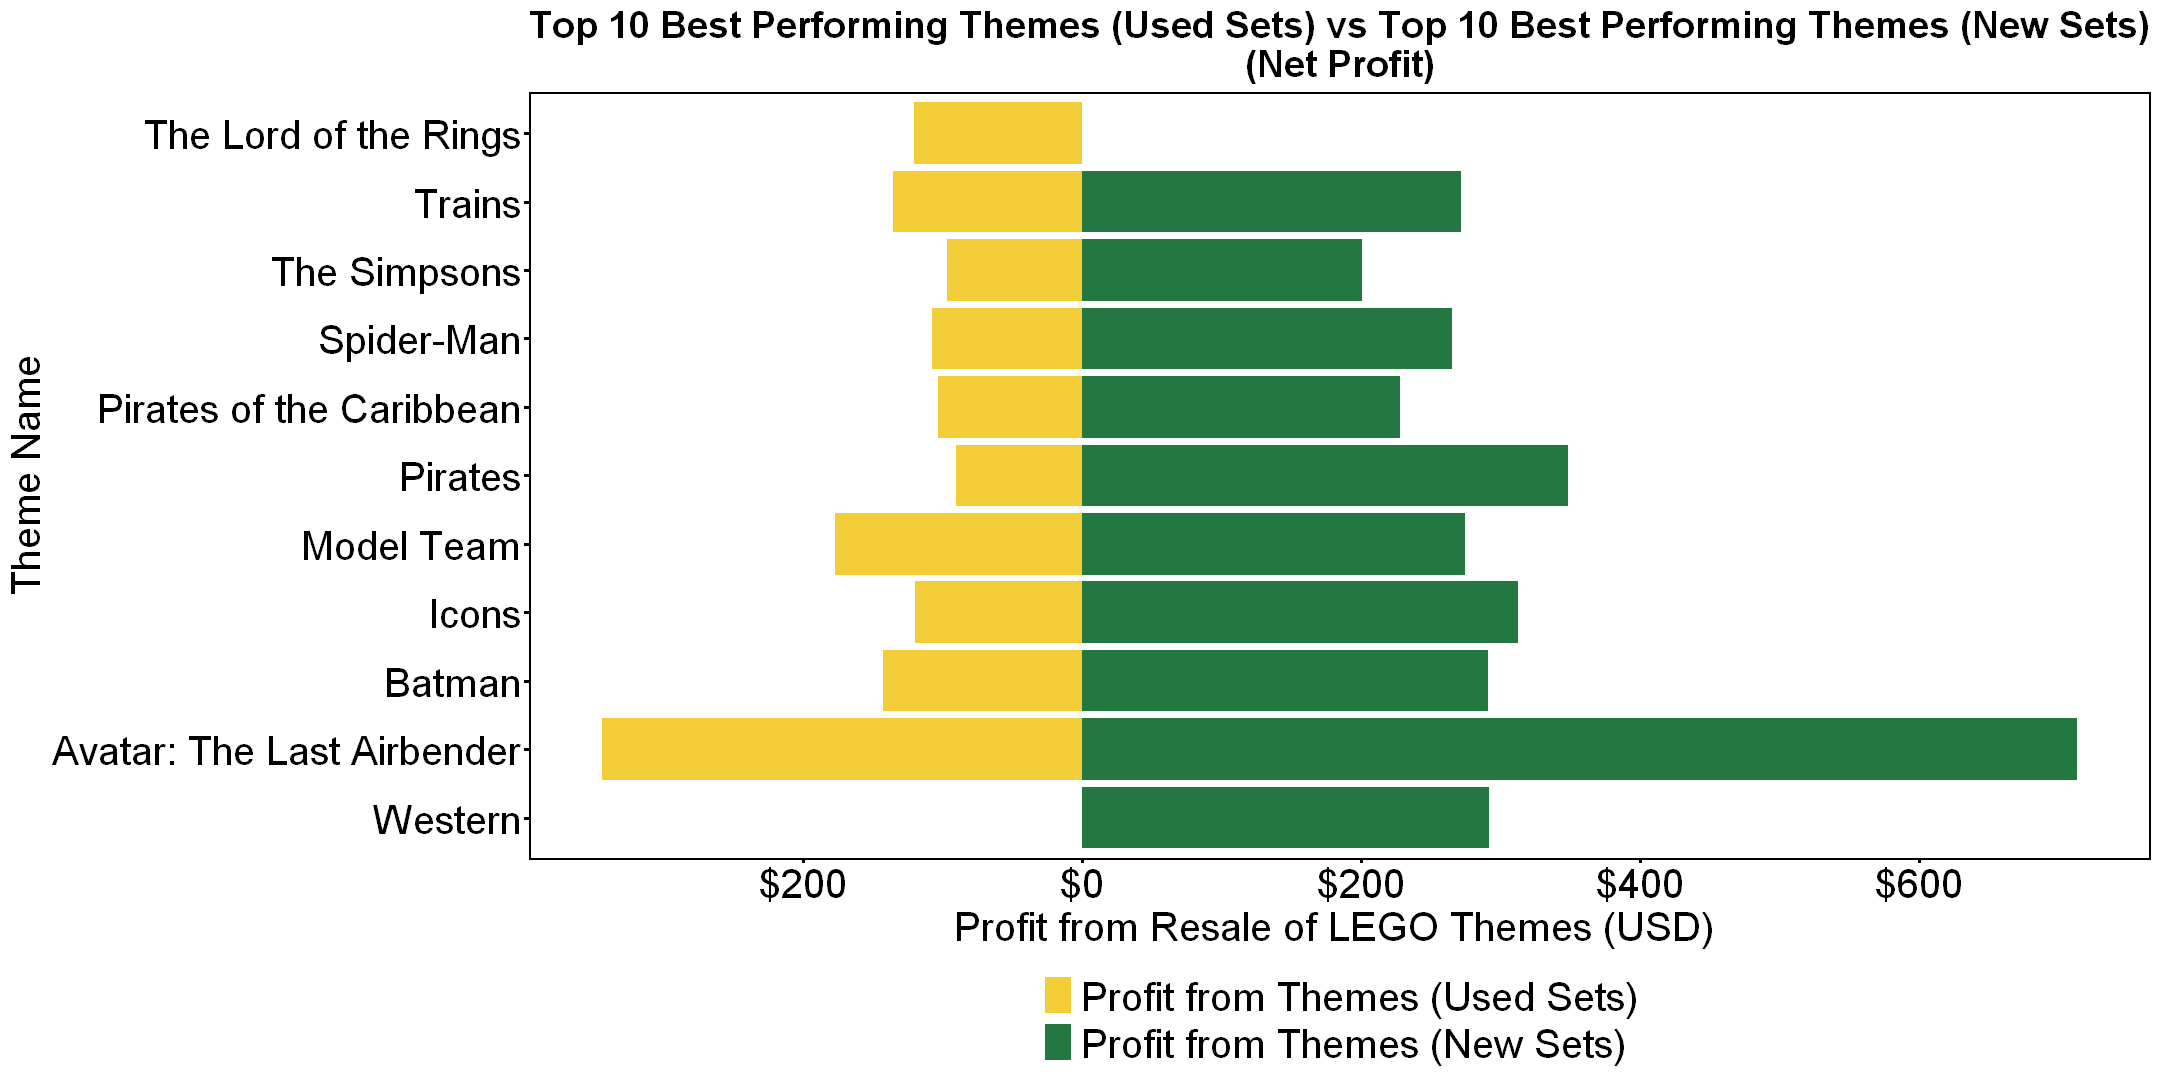

In [131]:
# Plot the Top 10 new LEGO set profit VS Top 10 used LEGO set profit
top_themes_profit_plot <- 
  used_new_themes_profit_data %>%
  ggplot(aes(y = reorder(theme_name, desc(category)))) +
    geom_bar(aes(x = ifelse(category == "used", -average_used_profit, average_new_profit), 
                 fill = category), stat = "identity", linewidth = 0.5) +
    scale_fill_manual(values = c("used" = "#F2CD37", "x_new" = "#237841"),
                      labels = c("Profit from Themes (Used Sets)", "Profit from Themes (New Sets)")) +
    labs(title = "Top 10 Best Performing Themes (Used Sets) vs Top 10 Best Performing Themes (New Sets)\n(Net Profit)",
         x = "Profit from Resale of LEGO Themes (USD) ",
         y = "Theme Name") +
    theme_minimal() +
    guides(fill = guide_legend(nrow = 2, byrow = TRUE)) +
   scale_x_continuous(breaks = c(seq(-600, -200, by = 200), 0, seq(200, 1000, by = 200)), 
                       labels = function(x) paste0("$", abs(x))) +  
    scale_y_discrete() + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.title = element_blank(),
          axis.text = element_text(size = 24, color = "black"),
          axis.title = element_text(size = 24),
          legend.text = element_text(size = 24),
          axis.ticks = element_line(size = 1), 
          plot.title = element_text(size = 22, hjust = 0.5, face = "bold"),
          panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
          axis.line = element_line(colour = "black", linewidth = 0.5),
          legend.position = "bottom")    
                       
top_themes_profit_plot

In [132]:
# Save the plot above
ggsave("top_themes_profit_plot.jpg", plot = top_themes_profit_plot, width = 18, height = 11, units = "in", dpi = 300)

In [133]:
# Find the top themes (used sets) with highest investment loss
top_used_themes_loss <-
  market_data %>%
  group_by(theme_name) %>%
  summarise(average_used_loss = mean(used_set_profit)) %>%
  arrange(average_used_loss) %>%
  head(10)

top_used_themes_loss

theme_name,average_used_loss
<chr>,<dbl>
Mindstorms,-85.99250
Boost,-53.74000
Art,-30.91000
Fusion,-23.32333
Education,-21.29400
World Racers,-18.45000
Make and Create,-17.33600
Trolls World Tour,-14.79286
Friends,-12.25234


In [134]:
# Find the top themes (new sets) with highest investment loss
top_new_themes_loss <-
  market_data %>%
  group_by(theme_name) %>%
  summarise(average_new_loss = mean(new_set_profit)) %>%
  arrange(average_new_loss) %>%
  head(10) %>%
  filter(average_new_loss < -0.05)

top_new_themes_loss

theme_name,average_new_loss
<chr>,<dbl>
Art,-16.4500000
Fusion,-8.6766667
Trolls World Tour,-4.9200000
Master Builder Academy,-3.4000000
Vidiyo,-0.6527778
Super Mario,-0.4889552


In [135]:
# Merge top 10 profit of new sets and used sets
# Creat a new variable "category" to distinguish whether the profit belongs to new set or used set
theme_loss_data <- 
  bind_rows(
    mutate(top_used_themes_loss, category = "used"),
    mutate(top_new_themes_loss, category = "x_new")
  )

theme_loss_data

theme_name,average_used_loss,category,average_new_loss
<chr>,<dbl>,<chr>,<dbl>
Mindstorms,-85.99250,used,NA
Boost,-53.74000,used,NA
Art,-30.91000,used,NA
Fusion,-23.32333,used,NA
Education,-21.29400,used,NA
World Racers,-18.45000,used,NA
Make and Create,-17.33600,used,NA
Trolls World Tour,-14.79286,used,NA
Friends,-12.25234,used,NA


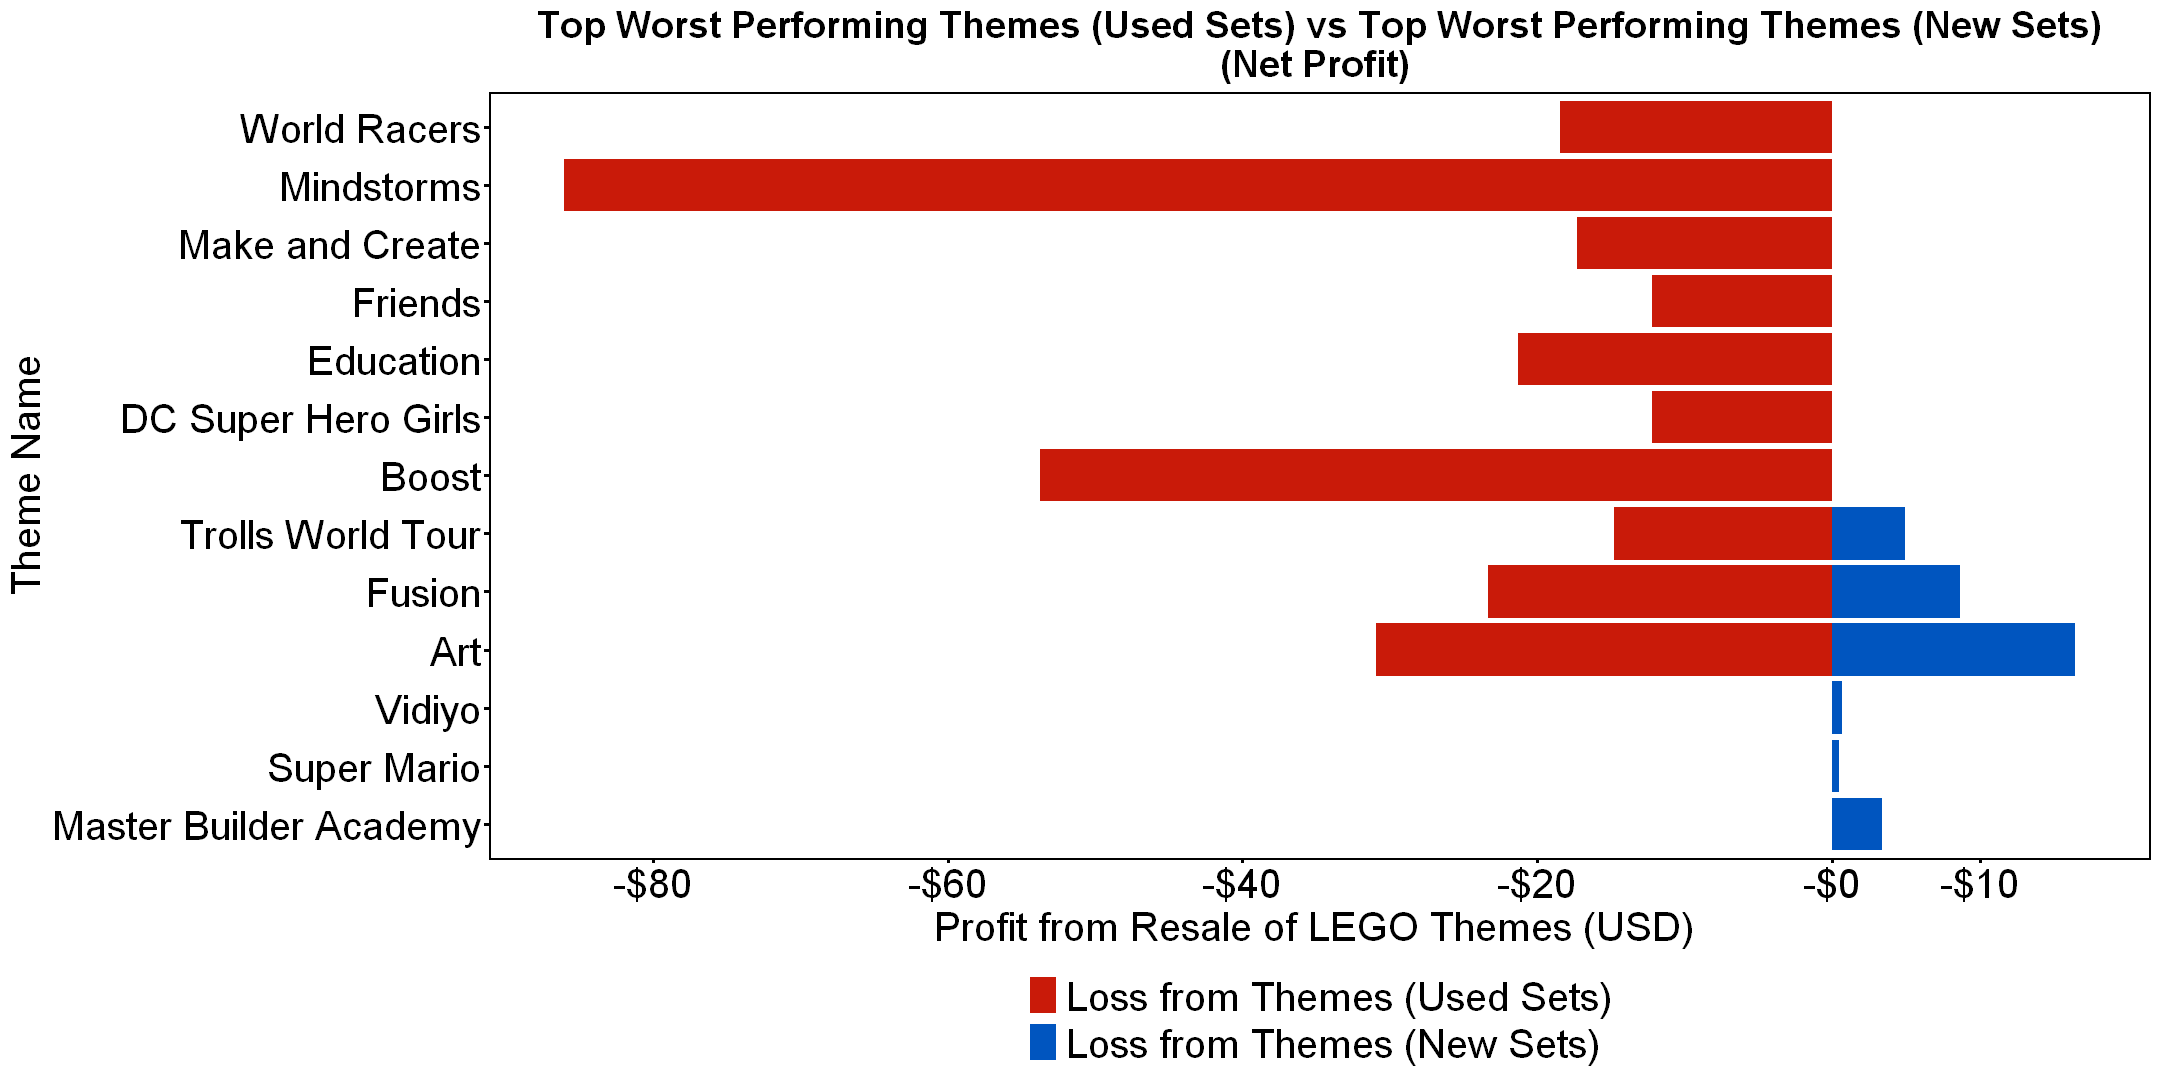

In [136]:
# Plot the Top 10 new LEGO set profit VS Top 10 used LEGO set profit
top_themes_loss_plot <- 
  theme_loss_data %>%
  mutate(average_used_loss_k = average_used_loss /10) %>%
  ggplot(aes(y = reorder(theme_name, desc(category)))) +
    geom_bar(aes(x = ifelse(category == "used", average_used_loss, -average_new_loss), 
                 fill = category), stat = "identity", linewidth = 0.5) +
    scale_fill_manual(values = c("used" = "#C91A09", "x_new" = "#0055BF"),
                      labels = c("Loss from Themes (Used Sets)", "Loss from Themes (New Sets)")) +
    labs(title = "Top Worst Performing Themes (Used Sets) vs Top Worst Performing Themes (New Sets)\n(Net Profit) ",
         x = "Profit from Resale of LEGO Themes (USD) ",
         y = "Theme Name") +
    theme_minimal() +
    guides(fill = guide_legend(nrow = 2, byrow = TRUE)) +
    scale_x_continuous(breaks = c(seq(-80, -20, by = 20), 0, seq(0, 10, by = 10)), 
                       labels = function(x) paste0("-$", abs(x))) +  
    scale_y_discrete() + 
     theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          legend.title = element_blank(),
          axis.text = element_text(size = 24, color = "black"),
          axis.title = element_text(size = 24),
          legend.text = element_text(size = 24),
          axis.ticks = element_line(size = 1), 
          plot.title = element_text(size = 22, hjust = 0.5, face = "bold"),
          panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
          axis.line = element_line(colour = "black", linewidth = 0.5),
          legend.position = "bottom")    
                       
top_themes_loss_plot

In [137]:
# Save the plot above
ggsave("top_themes_loss_plot.jpg", plot = top_themes_loss_plot, width = 18, height = 11, units = "in", dpi = 300)

In [138]:
# Calculate the ROI and yearly investment rate for both used and new sets
market_data <-
  market_data %>%
  mutate(used_rate = used_set_profit/  retail_price * 100,
         new_rate = new_set_profit / retail_price * 100,
         yearly_used_rate = round(used_rate / ifelse(2022 - year == 0, 1, 2022 - year), 2),
         yearly_new_rate = round(new_rate / ifelse(2022 - year == 0, 1, 2022 - year), 2))

market_data

year,set_id,theme_name,set_name,retail_price,rating,used_set_profit,new_set_profit,used_rate,new_rate,yearly_used_rate,yearly_new_rate
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1996,4559-1,Trains,Cargo Railway,130.00,4.3,86.43,632.15,66.484615,486.26923,2.56,18.70
1996,4565-1,Trains,Freight and Crane Railway,140.00,4.4,103.55,449.41,73.964286,321.00714,2.84,12.35
1996,5876-1,Belville,Belville Hospital Ward,30.00,0.0,10.88,45.00,36.266667,150.00000,1.39,5.77
1996,6024-1,Castle,Bandit Ambush,6.50,3.9,72.29,207.25,1112.153846,3188.46154,42.78,122.63
1996,6135-1,Aquazone,Spy Shark,8.75,3.6,3.04,11.25,34.742857,128.57143,1.34,4.95
1996,6145-1,Aquazone,Crystal Crawler,12.00,3.8,5.05,82.67,42.083333,688.91667,1.62,26.50
1996,6190-1,Aquazone,Shark's Crystal Cave,50.00,4.4,56.77,350.00,113.540000,700.00000,4.37,26.92
1996,6244-1,Pirates,Armada Sentry,8.75,3.5,37.14,157.65,424.457143,1801.71429,16.33,69.30
1996,6334-1,Town,Wave Jump Racers,20.00,4.0,12.60,41.48,63.000000,207.40000,2.42,7.98


In [139]:
# Calculate the average return rate for themes
average_rates <- market_data %>%
  group_by(theme_name) %>%
  summarise(average_used_rate = mean(used_rate),
            average_new_rate = mean(new_rate)) %>%
  ungroup()

# Find the top 20 themes (used sets) with highest return rate
top_used_rate_themes <- average_rates %>%
  arrange(desc(average_used_rate)) %>%
  head(20)

# Find the top 20 themes (new sets) with highest return rate
top_new_rate_themes <- average_rates %>%
  arrange(desc(average_new_rate)) %>%
  head(20)

# Print the results
print("Top 20 themes by average used rate:")
print(top_used_rate_themes)

print("Top 20 themes by average new rate:")
print(top_new_rate_themes)

[1] "Top 20 themes by average used rate:"
# A tibble: 20 × 3
   theme_name                 average_used_rate average_new_rate
   <chr>                                  <dbl>            <dbl>
 1 Avatar: The Last Airbender              934.            1780.
 2 Spider-Man                              422.            1034.
 3 Batman                                  390.             817.
 4 Trains                                  315.             534.
 5 Western                                 269.            1036.
 6 FORMA                                   261.             391.
 7 Model Team                              259.             478.
 8 Vikings                                 234.             502.
 9 Adventurers                             232.             935.
10 The Lord of the Rings                   213.             335.
11 Indiana Jones                           211.             559.
12 Rock Raiders                            195.             907.
13 The Hobbit                

In [140]:
# Union the top 20 highest profit and top 20 highest return rate themes
interset_top_themes_roi <- 
  intersect(top_used_rate_themes$theme_name, top_new_rate_themes$theme_name)
interset_top_themes_roi

[1] "Avatar: The Last Airbender" "Spider-Man"                
 [3] "Batman"                     "Trains"                    
 [5] "Western"                    "Model Team"                
 [7] "Vikings"                    "Adventurers"               
 [9] "Indiana Jones"              "Rock Raiders"              
[11] "Pirates"                    "Castle"                    
[13] "Dino Attack"                "Studios"                   
[15] "Discovery"                  "Bionicle"

In [141]:
# Create a dataset for top themes with used sets in it
top_used_rate_themes <- c("Avatar: The Last Airbender", "Spider-Man","Batman",
                          "Trains", "Western" , "FORMA","Model Team","Vikings",
                          "Adventurers","The Lord of the Rings","Indiana Jones",
                          "Rock Raiders", "The Hobbit", "Pirates","Castle",
                          "Dino Attack","Pirates of the Caribbean",
                          "Studios","Discovery", "Bionicle") 

In [142]:
# Create a dataset for top themes with new sets in it
top_new_rate_themes <- c("Avatar: The Last Airbender", "Western","Spider-Man",
                          "Adventurers", "Studios" , "Rock Raiders","Batman",
                          "Bionicle","Pirates","Indiana Jones", "SpongeBob SquarePants",
                          "Aquazone","Trains", "Castle","Discovery","Vikings",
                          "Model Team","Time Cruisers", "Dino Attack", "Exo-Force") 

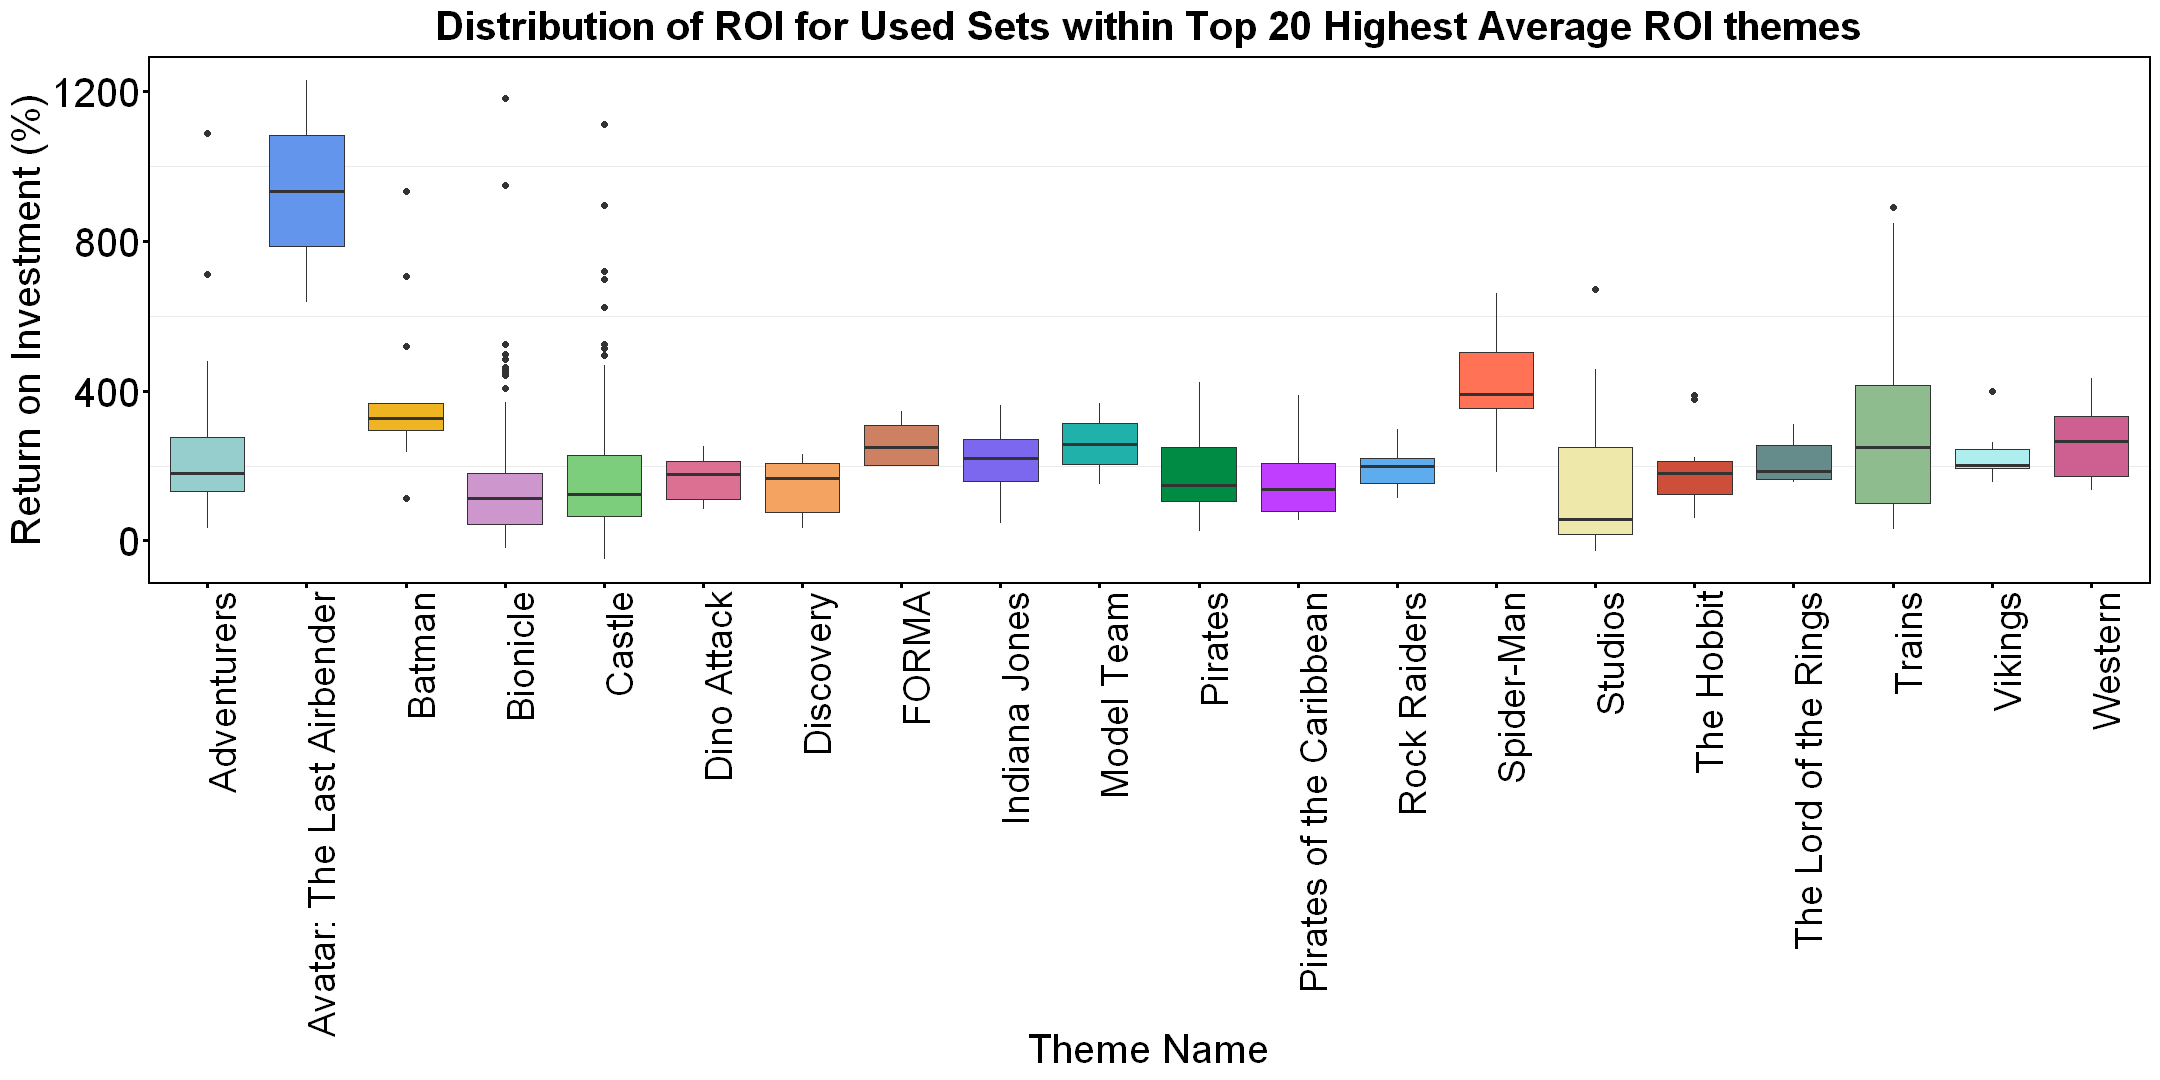

In [156]:
# Select the themes in the top return rate themes (used sets)
top_used_themes_data <- 
  market_data[market_data$theme_name %in% top_used_rate_themes, ]

# Assign the color for each theme
custom_colors <- c("Avatar: The Last Airbender" = "cornflowerblue", "Spider-Man" = "coral1","Batman" = "goldenrod2",
                   "Trains" = "darkseagreen", "Western" = "hotpink3", "FORMA" = "lightsalmon3","Model Team" = "lightseagreen",
                   "Vikings" = "paleturquoise", "Adventurers" = 'paleturquoise3',"The Lord of the Rings" = "paleturquoise4",
                   "Indiana Jones" = "mediumslateblue", "Exo-Force" = "rosybrown1","Rock Raiders" = "steelblue2",
                   "The Hobbit" = "tomato3", "Pirates" = "springgreen4","Castle" = "palegreen3","Dino Attack" = "palevioletred",
                   "Pirates of the Caribbean" = "darkorchid1", "Studios" = "palegoldenrod","Discovery" = "sandybrown",
                   "Aquazone" = "peru", "Bionicle" = "plum3", "SpongeBob SquarePants" = "pink2", "Time Cruisers" = "yellow2")

# Plot the boxplot for return rate of sets within each theme
top_used_themes_return_plot <- 
  top_used_themes_data %>%
  ggplot(aes(x = theme_name, y = used_rate, fill = theme_name)) +  
  geom_boxplot() +
  scale_fill_manual(values = custom_colors) +  
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Distribution of ROI for Used Sets within Top 20 Highest Average ROI themes", y = "Return on Investment (%)", x = "Theme Name") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        legend.position = "none",  
        axis.text.x = element_text(angle = 90, size = 22, hjust = 1, color = "black"),
        axis.text.y = element_text(size = 24, color = "black"),
        axis.title = element_text(size = 24),
        axis.ticks = element_line(size = 1), 
        plot.title = element_text(size = 24, hjust = 0.5, face = "bold"),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
        axis.line = element_line(colour = "black", linewidth = 0.5))

top_used_themes_return_plot

In [153]:
# Save the plot above
ggsave("top_used_themes_return_plot.jpg", plot = top_used_themes_return_plot, width = 15, height = 9, units = "in", dpi = 300)

In [154]:
# Select the themes in the top return rate themes (new sets)
top_new_themes_data <- 
  market_data[market_data$theme_name %in% top_new_rate_themes, ] %>%
  filter(!(theme_name == "Studios" & new_rate >= 7700))

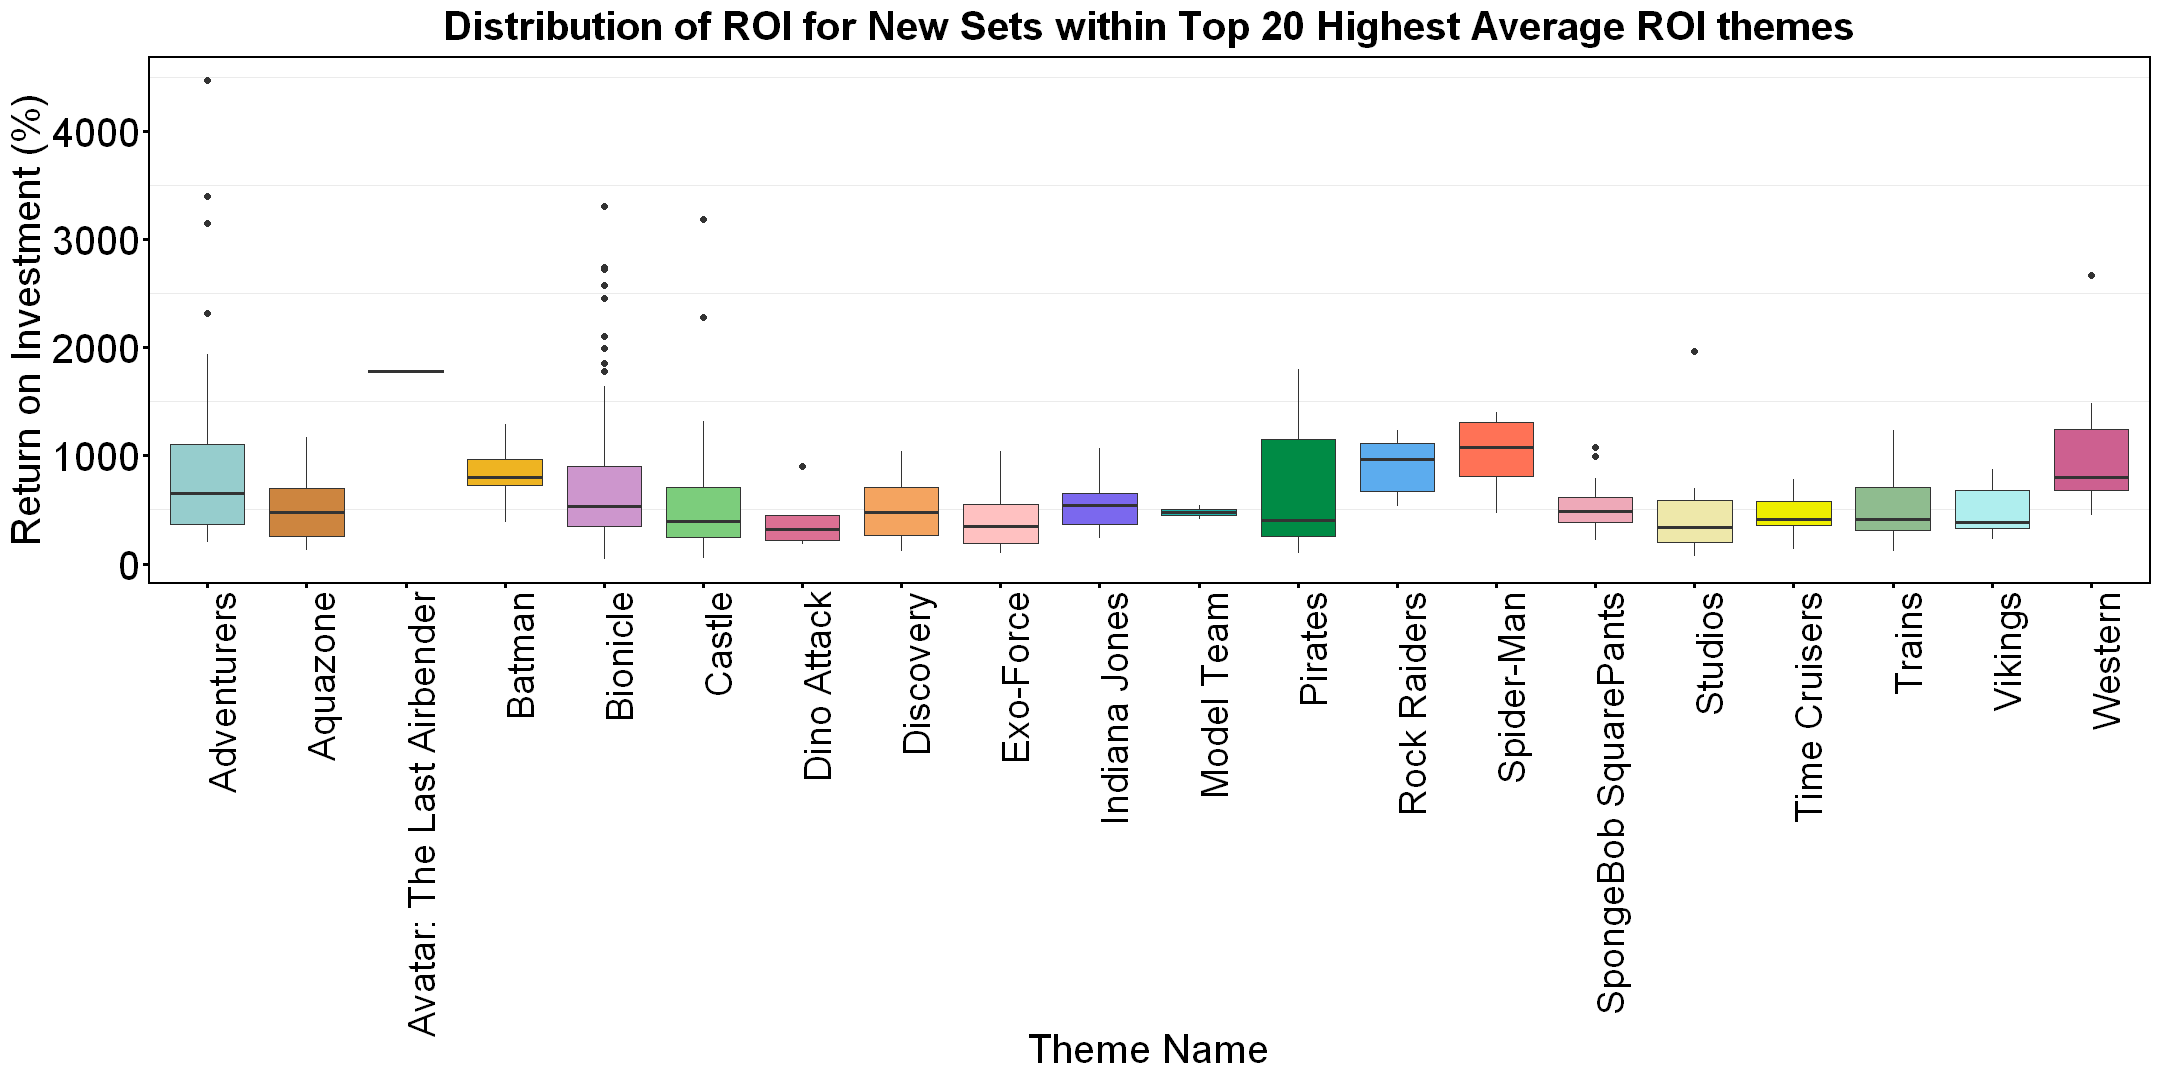

In [158]:
# Plot the boxplot for return rate of sets within each theme
top_new_themes_return_plot <-
  top_new_themes_data %>%
  ggplot(aes(x = theme_name, y = new_rate, fill = theme_name)) + 
  geom_boxplot() +
  scale_fill_manual(values = custom_colors) +  
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Distribution of ROI for New Sets within Top 20 Highest Average ROI themes", y = "Return on Investment (%)", x = "Theme Name") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        legend.position = "none",  
        axis.text.x = element_text(angle = 90, size = 22, hjust = 1, color = "black"),
        axis.text.y = element_text(size = 24, color = "black"),
        axis.title = element_text(size = 24),
        axis.ticks = element_line(size = 1), 
        plot.title = element_text(size = 24, hjust = 0.5, face = "bold"),
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
        axis.line = element_line(colour = "black", linewidth = 0.5))
  

top_new_themes_return_plot

In [160]:
# Save the plot above
ggsave("top_new_themes_return_plot.jpg", plot = top_new_themes_return_plot, width = 15, height = 9, units = "in", dpi = 300)

In [88]:
# Find the top 20 themes with highest profit (used sets)
top_20_used_themes_profit <-
  market_data %>%
  group_by(theme_name) %>%
  summarise(average_used_profit = mean(used_set_profit)) %>%
  arrange(desc(average_used_profit)) %>%
  head(20)

top_20_used_themes_profit

theme_name,average_used_profit
<chr>,<dbl>
Avatar: The Last Airbender,344.01000
Model Team,176.92500
Batman,142.76538
Trains,135.42455
The Lord of the Rings,120.65000
Icons,119.82627
Spider-Man,107.36625
Pirates of the Caribbean,103.65200
The Simpsons,96.80000


In [89]:
# Find the top 20 themes with highest profit (new sets)
top_20_new_themes_profit <-
  market_data %>%
  group_by(theme_name) %>%
  summarise(average_new_profit = mean(new_set_profit)) %>%
  arrange(desc(average_new_profit)) %>%
  head(20)

top_20_new_themes_profit

theme_name,average_new_profit
<chr>,<dbl>
Avatar: The Last Airbender,713.2000
Pirates,348.5300
Icons,312.2551
Western,291.7475
Batman,291.1700
Model Team,274.5500
Trains,271.6305
Spider-Man,265.0375
Pirates of the Caribbean,227.6740


In [90]:
# Find the name of top profit themes (used sets)
theme_names_used <- 
  top_20_used_themes_profit$theme_name

# Find the name of top profit themes (new sets)
theme_names_new <- 
  top_20_new_themes_profit$theme_name

# Find the themes within both top 20 highest profit and top 20 highest ROI
top_theme_union <- 
  unique(c(theme_names_used, theme_names_new, top_used_rate_themes, top_new_rate_themes))

# Print the result
top_theme_union

[1] "Avatar: The Last Airbender" "Model Team"                
 [3] "Batman"                     "Trains"                    
 [5] "The Lord of the Rings"      "Icons"                     
 [7] "Spider-Man"                 "Pirates of the Caribbean"  
 [9] "The Simpsons"               "Pirates"                   
[11] "Stranger Things"            "Western"                   
[13] "Indiana Jones"              "The Hobbit"                
[15] "Vikings"                    "FORMA"                     
[17] "Discovery"                  "Adventurers"               
[19] "Scooby-Doo"                 "Monster Fighters"          
[21] "Rock Raiders"               "SpongeBob SquarePants"     
[23] "Hobby Set"                  "Star Wars"                 
[25] "Aquazone"                   "Castle"                    
[27] "Dino Attack"                "Studios"                   
[29] "Bionicle"                   "Time Cruisers"             
[31] "Exo-Force"

### Calculate the Net Profit (USD) , Return on Investment (%), and Arithmetic Average Annual Return (%)

In [91]:
# Have a look at the dataset
market_data %>% 
  glimpse()

Rows: 5,002
Columns: 12
$ year             <dbl> 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,…
$ set_id           <chr> "4559-1", "4565-1", "5876-1", "6024-1", "6135-1", "61…
$ theme_name       <chr> "Trains", "Trains", "Belville", "Castle", "Aquazone",…
$ set_name         <chr> "Cargo Railway", "Freight and Crane Railway", "Belvil…
$ retail_price     <dbl> 130.00, 140.00, 30.00, 6.50, 8.75, 12.00, 50.00, 8.75…
$ rating           <dbl> 4.3, 4.4, 0.0, 3.9, 3.6, 3.8, 4.4, 3.5, 4.0, 3.9, 3.3…
$ used_set_profit  <dbl> 86.43, 103.55, 10.88, 72.29, 3.04, 5.05, 56.77, 37.14…
$ new_set_profit   <dbl> 632.15, 449.41, 45.00, 207.25, 11.25, 82.67, 350.00, …
$ used_rate        <dbl> 66.484615, 73.964286, 36.266667, 1112.153846, 34.7428…
$ new_rate         <dbl> 486.2692, 321.0071, 150.0000, 3188.4615, 128.5714, 68…
$ yearly_used_rate <dbl> 2.56, 2.84, 1.39, 42.78, 1.34, 1.62, 4.37, 16.33, 2.4…
$ yearly_new_rate  <dbl> 18.70, 12.35, 5.77, 122.63, 4.95, 26.50, 26.92, 69.30…


In [92]:
# Calculate the Net Profit, Reture on Investment, yearly return rate for each set in both usd and new conditions
revenue_data <- 
  market_data %>%
  mutate(
    used_rate = round(used_set_profit / retail_price, 2),
    new_rate = round(new_set_profit / retail_price, 2),
    yearly_used_rate = round(used_rate / ifelse(2022 - year == 0, 1, 2022 - year), 2),
    yearly_new_rate = round(new_rate / ifelse(2022 - year == 0, 1, 2022 - year), 2)
  )

In [93]:
# Check the statistics of the dataset
summary(revenue_data)

      year         set_id           theme_name          set_name        
 Min.   :1996   Length:5002        Length:5002        Length:5002       
 1st Qu.:2008   Class :character   Class :character   Class :character  
 Median :2014   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2012                                                           
 3rd Qu.:2017                                                           
 Max.   :2022                                                           
  retail_price        rating     used_set_profit    new_set_profit   
 Min.   :  1.00   Min.   :0.00   Min.   :-133.210   Min.   : -78.66  
 1st Qu.:  9.00   1st Qu.:3.50   1st Qu.:  -5.420   1st Qu.:   3.36  
 Median : 19.99   Median :3.80   Median :   0.405   Median :  16.42  
 Mean   : 34.46   Mean   :3.42   Mean   :  12.552   Mean   :  60.06  
 3rd Qu.: 40.00   3rd Qu.:4.10   3rd Qu.:  11.158   3rd Qu.:  58.47  
 Max.   :699.99   Max.   :4.90   Max.   :1070.200   Max.   :8900.00  